# Consumer Spending in Canada  
## A 12-Year Provincial Analysis of Patterns, Key Drivers, Regional Variations, and Future Trends  

### 1 GROUP E MEMBERS  
- Jereika Aiko Tan  
- Luzviminda Deinla  
- Shijie Liu  
- Simarpreet Kaur  

---

### 2 PROBLEM STATEMENT
 - Over the past 12 years, consumer spending in Canada has been influenced by economic factors like income, inflation, and demographic shifts, with notable variations across provinces due to regional conditions and cultural differences. 
 - However, most studies focus on national-level trends, leaving a gap in understanding province-specific spending patterns. 
 - This study addresses this gap by analyzing consumer spending trends, identifying key drivers and regional differences, and developing predictive models, ultimately providing insights to guide effective responses to future market changes. 


---
    
### 3 OBJECTIVES  
1. Analyze the historical spending patterns in each Canadian province, particularly the major provinces (Ontario, British Columbia, Alberta, Quebec) and Saskatchewan from 2010 to 2021, focusing on housing, food, transportation, and *discretionary goods.  
2. Assess the impact of economic and demographic factors** (e.g., income, inflation, household size, aging) on consumer spending behavior.  
3. Identify regional differences in spending trends and explore their causes.  
4. Develop and evaluate predictive models based on historical data and key drivers, selecting the most accurate model to support businesses and policymakers in forecasting future demand.


### 4 DATA SOURCES

Our dataset is a collection of Household spend data, Disposable income per household and Consumer Price Index taken from the below sources:

<div style="display: flex; justify-content: space-around; align-items: center;">
    <img src="https://i.imgur.com/naA1xSX.png" alt="StatCan" width="300" height="30" style="margin: 0 20px;"/>
    <img src="https://i.imgur.com/8vu6ZYu.png" alt="GovCan" style="max-width: 1000px; max-height: 70px; margin: 0 70px;"/>
    <img src="https://i.imgur.com/5LkxgbC.png" alt="Bankof Can" width="200" height="50" style="margin: 0 20px;"/>
</div>



### 5 TOOLS AND METHODOLOGY

We used Microsoft Excel for the initial data preparation and cleansing and then used Python Jupyter notebook for further data cleansing, Exploratory Data Analysis and Predictive Modeling.

<div style="display: flex; justify-content: space-around; align-items: center;">
    <img src="https://i.imgur.com/SHslT1L.png" alt="MSExcelLogo" width="400" height="1" style="margin: 0 10px;"/>
    <img src="https://i.imgur.com/gOEeYzU.png" alt="PythonLogo" style="max-width: 1000px; max-height: 70px; margin: 0 10px;"/>
    <img src="https://i.imgur.com/S4qDRb4.png" alt="JupyterLogo" width="200" height="50" style="margin: 0 20px;"/>
</div>



##### Initial Data Preparation and Cleaning through MS excel.
 - Created a unified, multidimensional dataset by merging 5 files from various sources
 - Narrowed sub-categories from 362 down to 10 key spend categories and removed the duplicates without losing relevant information as the collected dataset was organized into main categories and sub-categories, with totals and subtotals
 - Due to merging process, some variables in the dataset did not align consistently across all records, resulting in blanks or missing data. To address this, these blanks were replaced with zero values (0) as placeholders, ensuring the dataset remains complete and usable for analysis while preserving its structure.
 - Removed irrelevant rows and columns, ensure comparability across records.
 - Added a 'Data Type' column to simplify filtering and segmentation by grouping data into categories like 'Spend: Category,' 'Spend: Age,' and 'Income: Age.' This enables targeted analysis of specific aspects, enhancing the dataset's usability and aligning it with our project's analysis objectives.

### 6 DATA LOADING AND INITIAL INSPECTION

### 6.1 Importing necessary libraries

In [44]:
# For data cleaning/wrangling
import numpy as np # vectors and matrices || Linear Algebra
import pandas as pd # tables and data manipulations
# Visualization Libraries
import matplotlib.pyplot as plt # plots
import seaborn as sns # attractive plots

### 6.2 Loading the dataset

In [45]:
dataset = pd.read_csv('Household Spend, Income and Consumer Price Index_upload file.csv')
dataset.head()

,Year,Region,Data Type,Household Spend Category,Income Quintile,Household Type,Age Group,Average expenditure per household (CAD),Consumer Price Index,Disposable income per household (CAD)
0,2010,Canada,Spend: Category,Food,0,0,0,5709.0,123.1,0.0
1,2010,Canada,Spend: Category,Food,0,0,0,2141.0,123.1,0.0
2,2010,Canada,Spend: Category,Housing,0,0,0,3088.0,123.3,0.0
3,2010,Canada,Spend: Category,Housing,0,0,0,4699.0,123.3,0.0
4,2010,Canada,Spend: Category,Housing,0,0,0,383.0,123.3,0.0


- Dataset successfully loaded, displaying the first few rows for initial inspection. Data includes columns for spending categories, income quintile, household type, and relevant financial metrics across Canadian regions.

### 6.3 Missing Values Check

In [46]:
dataset.isnull().sum()

Year                                       0
Region                                     0
Data Type                                  0
Household Spend Category                   0
Income Quintile                            0
Household Type                             0
Age Group                                  0
Average expenditure per household (CAD)    0
Consumer Price Index                       0
Disposable income per household (CAD)      0
dtype: int64

- No missing values found in any columns.

### 6.4 Data Types Overview

In [47]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50545 entries, 0 to 50544
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Year                                     50545 non-null  int64  
 1   Region                                   50545 non-null  object 
 2   Data Type                                50545 non-null  object 
 3   Household Spend Category                 50545 non-null  object 
 4   Income Quintile                          50545 non-null  object 
 5   Household Type                           50545 non-null  object 
 6   Age Group                                50545 non-null  object 
 7   Average expenditure per household (CAD)  50545 non-null  float64
 8   Consumer Price Index                     50545 non-null  float64
 9   Disposable income per household (CAD)    50545 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usag

 - The dataset consists of 50,545 datapoints, 10 columns with a mix of integer, float, and object data types.

### 7 EXPLORATORY DATA ANALYSIS

Since we have a merged dataset, we used pivot table to strategically aggregate, filter, and organize data based on categories or fields for targetted descriptive analysis.

### 7.1 Summary Statistics for Numeric Variables

In [48]:
summary_stats = dataset.describe()
# Print the summaries
print("Summary Statistics for Numeric Variables:\n")
print(summary_stats)

Summary Statistics for Numeric Variables:

               Year  Average expenditure per household (CAD)  \
count  50545.000000                             50545.000000   
mean    2014.827065                              1273.998259   
std        3.365301                              2887.531264   
min     2010.000000                                 0.000000   
25%     2012.000000                               123.000000   
50%     2015.000000                               497.000000   
75%     2017.000000                              1322.000000   
max     2021.000000                             75688.000000   

       Consumer Price Index  Disposable income per household (CAD)  
count          50545.000000                           50545.000000  
mean             108.127346                            2236.054783  
std               40.489372                           14125.630277  
min                0.000000                               0.000000  
25%              100.500000        

######  Average Expenditure per Household (CAD):
 - Skewed distribution with higher maximum values due to high-income households or high-cost essential spending categories like housing.
 - Low median (497 CAD) and mean (1273.99 CAD) values indicate diverse spending behavior, with many households spending less while the average reflects a broad range of spending categories, including some with lower costs
 - The 0 values represent missing expenditure data missing data rather than actual values due to gaps caused by merging process.  They are placeholders used to retain the features in the dataset and are important for maintaining  dataset structure without distorting the analysis.
###### Consumer Price Index (CPI):
 - Reflects inflation trends over the years, with a mean of 108.13 and rising quartiles.
 - High variability (std: 40.49) suggests significant economic events impacting inflation.
 - 0 values likely indicate missing CPI data rather than true economic conditiondue to gaps caused by merging process.  They are placeholders used to retain the features in the dataset and are important for maintaining  dataset structure without distorting the analysis.
###### Disposable Income per Household (CAD):
 - Large variation (std: 14,125.63 CAD) highlights broad income disparities across households.
 - The presence of many 0 values suggests missing data  rather than actual values due to gaps caused by merging process.  They are placeholders used to retain the features in the dataset and are important for maintaining  dataset structure without distorting the analysis.
 - Maximum income (220,402 CAD) reflects high-income households significantly impacting the range.


### 7.2 Trend Analysis: Overview of Spending Over Years

### 7.2.1 Household Spending Trends by Category (2010-2021)
We used line charts to visualize the overall historic trends on key expenditure categories such as Food, Housing, Transportation, and Discretionary Goods from the year 2010 to 2021.

Filtered Pivot Table by Household Spend Category
Household Spend Category     Food  Housing  Transportation  \
Year                                                         
2010                       7850.0  15021.0         11158.0   
2011                       7791.0  15216.0         11260.0   
2012                       7759.0  15808.0         11203.0   
2013                       7934.0  16360.0         12045.0   
2014                       8109.0  17160.0         11891.0   
2015                       8628.0  17509.0         11762.0   
2016                       8784.0  18032.0         11907.0   
2017                       8968.0  18638.0         12721.0   
2019                      10311.0  20201.0         12737.0   
2021                      10254.0  21105.0         10098.0   

Household Spend Category  Discretionary goods  
Year                                           
2010                                   8708.0  
2011                                   9376.0  
2012          

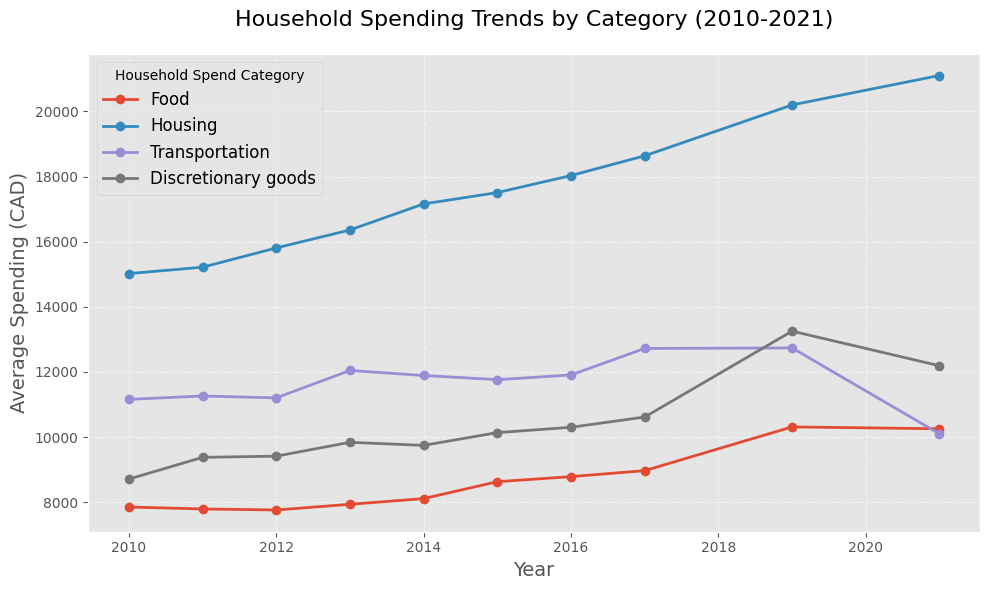

In [49]:
# Filter 'Spend: Category'
filtered_dataset_cat = dataset[dataset['Data Type'] == 'Spend: Category']

# Filter rows where 'Region' column is 'Canada'
filtered_dataset_cat = filtered_dataset_cat[filtered_dataset_cat['Region'] == 'Canada']

# Create pivot table
pivot_table_cat = pd.pivot_table(
    filtered_dataset_cat,
    values='Average expenditure per household (CAD)',
    index='Year', 
    columns='Household Spend Category', 
    aggfunc='sum',
    margins=True,  
    margins_name='Grand Total'
)

# Filter specific categories (Food, Housing, Transportation, Discretionary goods)
filtered_pivot_table_cat = pivot_table_cat[['Food', 'Housing', 'Transportation', 'Discretionary goods']]

# Filter out rows where index is  'Grand Total'
filtered_pivot_table_cat = filtered_pivot_table_cat[filtered_pivot_table_cat.index != 'Grand Total']

# Print the final filtered pivot table
print("Filtered Pivot Table by Household Spend Category")
print(filtered_pivot_table_cat)
import matplotlib.pyplot as plt

# Set a style
plt.style.use('ggplot')


# Plot each household spend category with a line chart
plt.figure(figsize=(10, 6))

# Loop through each column in the filtered pivot table and plot it with specified colors
for category in filtered_pivot_table_cat.columns:
    plt.plot(
        filtered_pivot_table_cat.index, 
        filtered_pivot_table_cat[category], 
        marker='o', 
        label=category,
        linewidth=2
    )

# Add titles and labels
plt.title('Household Spending Trends by Category (2010-2021)', fontsize=16, pad=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Spending (CAD)', fontsize=14)
plt.legend(title="Household Spend Category", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


 - The trend analysis reveals a continuous increase in essential spending, with food and housing consistently prioritized due to their necessity. Housing, in particular, experienced the most substantial growth.
 - While transportation spending initially rose, it sharply declined post-2019 due to the COVID-19 pandemic, reflecting reduced commuting and travel needs.
 - Discretionary spending peaked in 2019 but saw a slight decline by 2021, likely due to pandemic-induced economic caution.

### 7.2.2 Household Spending Trends by Province (2010-2021)

We created line charts to illustrate the historical spending trends of households in key provinces, including Ontario, British Columbia, Alberta, Quebec, and Saskatchewan, spanning the years 2010 to 2021.

Filtered Pivot Table by Province
Region   Alberta  British Columbia  Ontario   Quebec  Saskatchewan
Year                                                              
2010     89625.0           75051.0  75975.0  62878.0       70826.0
2011     89903.0           75446.0  77443.0  65152.0       71125.0
2012     97847.0           74764.0  79264.0  65236.0       75473.0
2013    101888.0           79082.0  82688.0  69072.0       79768.0
2014    100960.0           80673.0  84437.0  68961.0       85024.0
2015    110308.0           85704.0  85481.0  68197.0       89737.0
2016    106462.0           85820.0  89065.0  70739.0       89234.0
2017    101135.0           92691.0  90586.0  73558.0       88346.0
2019    113743.0          102924.0  98090.0  81073.0       97446.0
2021    104371.0          101374.0  98241.0  81733.0       92307.0


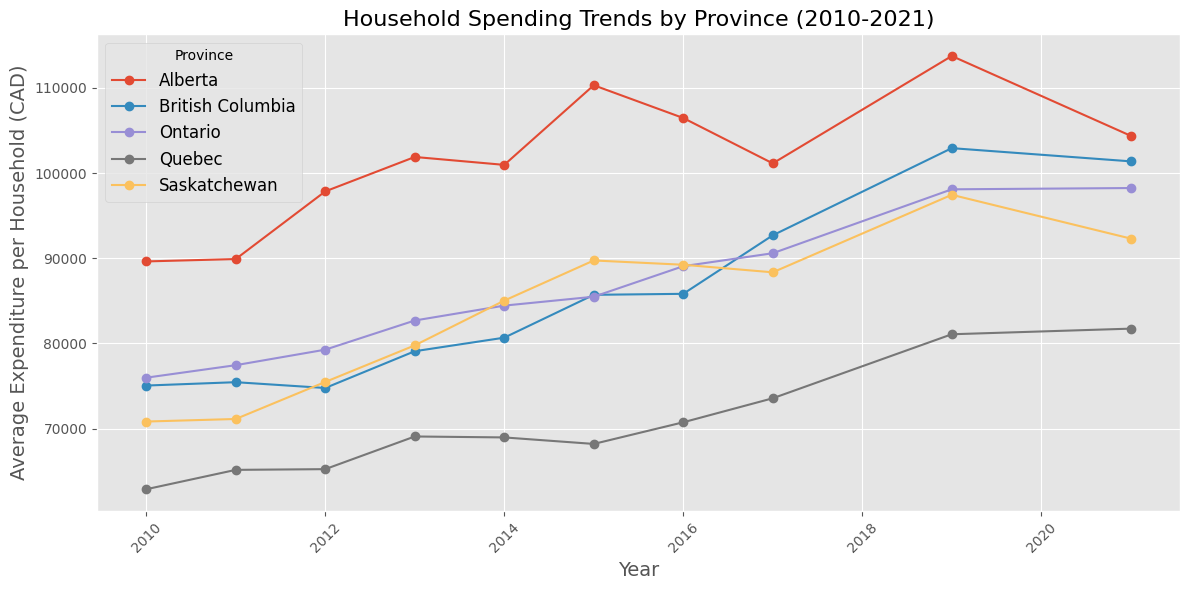

In [50]:
# Filter 'Spend: Category'
filtered_dataset_prov = dataset[dataset['Data Type'] == 'Spend: Category']

# Create pivot table
pivot_table_prov = pd.pivot_table(
    filtered_dataset_prov,
    values='Average expenditure per household (CAD)',
    index='Year', 
    columns='Region', 
    aggfunc='sum',
    margins=True,  
    margins_name='Grand Total'
)

# Filter specific provinces
filtered_pivot_table_prov = pivot_table_prov[['Alberta', 'British Columbia', 'Ontario', 'Quebec', 'Saskatchewan']]

# Filter out rows where index is  'Grand Total'
filtered_pivot_table_prov = filtered_pivot_table_prov[filtered_pivot_table_prov.index != 'Grand Total']

# Print the final filtered pivot table
print("Filtered Pivot Table by Province")
print(filtered_pivot_table_prov)

import pandas as pd
import matplotlib.pyplot as plt

# Create a line chart
plt.figure(figsize=(12, 6))
for province in filtered_pivot_table_prov.columns:
    plt.plot(filtered_pivot_table_prov.index, 
             filtered_pivot_table_prov[province], 
             marker='o', 
             label=province, 
            )
# Add titles and labels
plt.title('Household Spending Trends by Province (2010-2021)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Expenditure per Household (CAD)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Province', fontsize=12)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

- Household spending trends vary across provinces, with Alberta consistently showing the highest average expenditure per household, despite some fluctuations. 
- British Columbia and Ontario show steady growth, while Quebec and Saskatchewan have relatively lower and stable spending trends. 
- The differences highlight regional disparities in household spending across Canada from 2010 to 2021.

### 7.3 Provincial Share of Household Expenditure
We used a pie chart to display the distribution of household expenditure across different provinces, highlighting each province's share of total spending.

Filtered Pivot Table by Province1
                  Average expenditure per household (CAD)
Region                                                   
Alberta                                         1016242.0
British Columbia                                 853529.0
Ontario                                          861270.0
Quebec                                           706599.0
Saskatchewan                                     839286.0


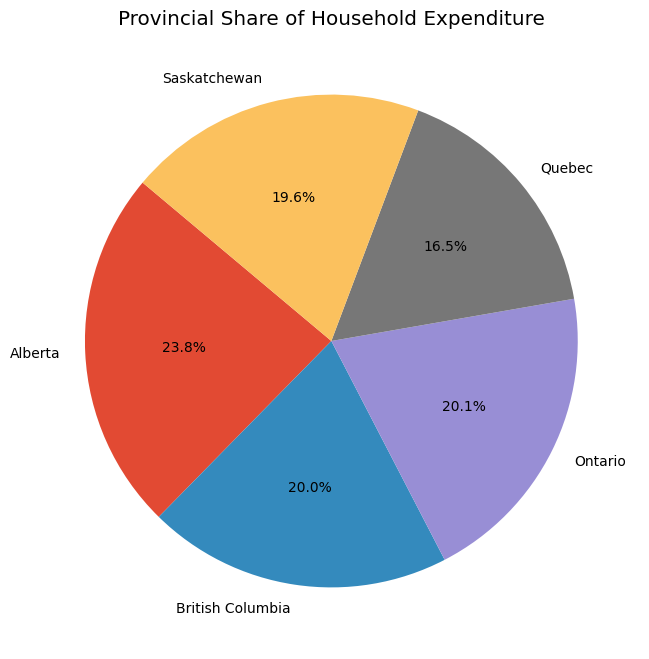

In [51]:
# Filter rows where 'Data Type' is 'Spend: Category'
filtered_dataset_prov1 = dataset[dataset['Data Type'] == 'Spend: Category']

# Create pivot table
pivot_table_prov1 = pd.pivot_table(
    filtered_dataset_prov1,
    values='Average expenditure per household (CAD)',
    index='Region', 
    aggfunc='sum',
    margins=False,
)

# Filter specific provinces
filtered_pivot_table_prov1 = pivot_table_prov1.loc[['Alberta', 'British Columbia', 'Ontario', 'Quebec', 'Saskatchewan']]

# Print the final filtered pivot table
print("Filtered Pivot Table by Province1")
print(filtered_pivot_table_prov1)

import matplotlib.pyplot as plt

# Plot a pie chart to show the share of household expenditure by province
plt.figure(figsize=(8, 8))
plt.pie(
    filtered_pivot_table_prov1['Average expenditure per household (CAD)'],
    labels=filtered_pivot_table_prov1.index,
    autopct='%1.1f%%',  # Display percentage to 1 decimal place
    startangle=140, ) # Start angle for better layout

# Title for the pie chart
plt.title('Provincial Share of Household Expenditure')

# Show the pie chart
plt.show()



- The pie chart shows that Alberta has the highest share of household expenditure at 23.8%, followed closely by Ontario (20.1%) and British Columbia (20.0%). Saskatchewan (19.6%) and Quebec (16.5%) have relatively lower shares. 
- This distribution highlights Alberta's larger household expenditure compared to other provinces.

### 7.4 Regional Comparison of Household Spending by Category
We used bar charts to compare average household expenditure across provinces, broken down by category, for clearer visualization of regional spending differences.

### 7.4.1 Alberta

Filtered Pivot Table Alberta Household Spend
Household Spend Category     Food  Housing  Transportation  \
Year                                                         
2010                       8887.0  17415.0         12857.0   
2011                       8559.0  18618.0         13763.0   
2012                       8457.0  19227.0         14680.0   
2013                       9328.0  19397.0         15196.0   
2014                       8740.0  20486.0         15402.0   
2015                      10170.0  21600.0         16799.0   
2016                       9766.0  21314.0         15317.0   
2017                       9864.0  20970.0         15465.0   
2019                      11322.0  22410.0         15630.0   
2021                      11808.0  23050.0         11064.0   

Household Spend Category  Discretionary goods  
Year                                           
2010                                  11370.0  
2011                                  12385.0  
2012              

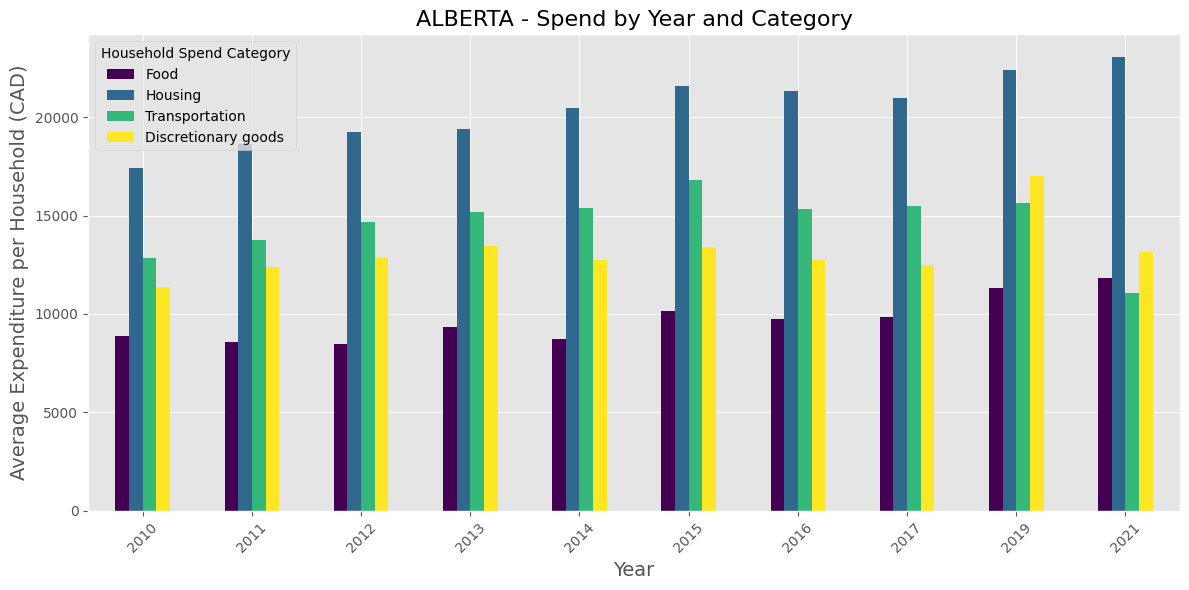

In [52]:
# Filter 'Spend: Category'
filtered_dataset_AB = dataset[dataset['Data Type'] == 'Spend: Category']

# Filter rows where 'Region' column is 'Alberta'
filtered_dataset_AB = filtered_dataset_AB[filtered_dataset_AB['Region'] == 'Alberta']

# Create pivot table
pivot_table_AB = pd.pivot_table(
    filtered_dataset_AB,
    values='Average expenditure per household (CAD)',
    index='Year',  
    columns='Household Spend Category',
    aggfunc='sum',
)

# Filter specific categories (Food, Housing, Transportation, Discretionary goods)
filtered_pivot_table_AB = pivot_table_AB[['Food', 'Housing', 'Transportation', 'Discretionary goods']]


# Reorder the columns in the specific order
column_order = ['Food', 'Housing', 'Transportation', 'Discretionary goods']
filtered_pivot_table_AB = filtered_pivot_table_AB[column_order]

# Print the final filtered pivot table
print("Filtered Pivot Table Alberta Household Spend")
print(filtered_pivot_table_AB)

# Plot the bar chart
filtered_pivot_table_AB.plot(kind='bar', figsize=(12, 6), colormap='viridis')

# Customize the plot
plt.title('ALBERTA - Spend by Year and Category', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Expenditure per Household (CAD)', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Household Spend Category', fontsize=10)

# Step 10: Save the bar chart as an image file
plt.savefig('Alberta.png', format='png', dpi=300)

# Step 11: Show the bar chart
plt.tight_layout()  # Adjust layout for better fit
plt.show()

 - Alberta households consistently allocate the highest proportion of their budgets to housing, followed by transportation Alberta households consistently allocate the highest proportion of their budgets to housing, followed by transportation, while food and discretionary goods receive lower and more stable allocations.
 - The trends from 2010 to 2021 reflect rising housing and food costs, a sharp decline in transportation in 2021 due to the pandemic, and a notable decrease in discretionary spending following a peak in 2019, reflecting the impact of inflation, housing market pressures, and a shift in consumer priorities towards essential needs.

### 7.4.2 British Columbia

Filtered Pivot Table British Columbia Household Spend
Household Spend Category     Food  Housing  Transportation  \
Year                                                         
2010                       8732.0  16954.0         11267.0   
2011                       8121.0  16625.0         11046.0   
2012                       8438.0  18221.0         10448.0   
2013                       8118.0  18888.0         11298.0   
2014                       8218.0  18462.0         11464.0   
2015                       9168.0  19923.0         12012.0   
2016                       9139.0  19405.0         12079.0   
2017                       9735.0  21757.0         13942.0   
2019                      10639.0  23874.0         14259.0   
2021                      11283.0  24596.0         10870.0   

Household Spend Category  Discretionary goods  
Year                                           
2010                                   9507.0  
2011                                  10041.0  
2012     

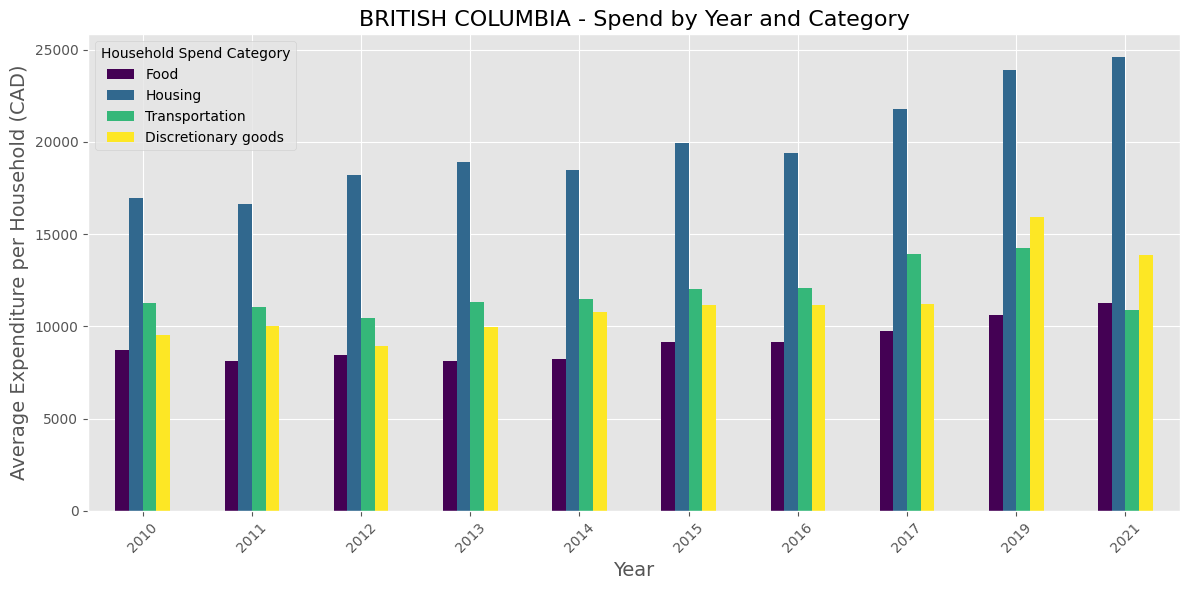

In [53]:
# Filter 'Spend: Category'
filtered_dataset_BC = dataset[dataset['Data Type'] == 'Spend: Category']

# Filter rows where 'Region' column is 'British Columbia'
filtered_dataset_BC = filtered_dataset_BC[filtered_dataset_BC['Region'] == 'British Columbia']

# Create pivot table
pivot_table_BC = pd.pivot_table(
    filtered_dataset_BC,
    values='Average expenditure per household (CAD)',
    index='Year',  
    columns='Household Spend Category',
    aggfunc='sum',
)

# Filter specific categories (Food, Housing, Transportation, Discretionary goods)
filtered_pivot_table_BC = pivot_table_BC[['Food', 'Housing', 'Transportation', 'Discretionary goods']]


# Reorder the columns in the specific order
column_order = ['Food', 'Housing', 'Transportation', 'Discretionary goods']
filtered_pivot_table_BC = filtered_pivot_table_BC[column_order]

# Print the final filtered pivot table
print("Filtered Pivot Table British Columbia Household Spend")
print(filtered_pivot_table_BC)

# Plot the bar chart
filtered_pivot_table_BC.plot(kind='bar', figsize=(12, 6), colormap='viridis')

# Customize the plot
plt.title('BRITISH COLUMBIA - Spend by Year and Category', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Expenditure per Household (CAD)', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Household Spend Category', fontsize=10)

# Save the bar chart as an image file
plt.savefig('BC.png', format='png', dpi=300)

# Show the bar chart
plt.tight_layout()  # Adjust layout for better fit
plt.show()

 - Households in British Columbia consistently allocate the largest portion of their budgets to housing, with transportation, discretionary goods, and food following at a considerable distance.
 - The trends from 2010 to 2021 reflect rising housing and food costs, a decline in transportation spending due to the pandemic, and a shift in discretionary spending towards essential needs, highlighting the impact of inflation, housing market pressures, and economic caution on spending behavior.

### 7.4.3 Ontario

Filtered Pivot Table Ontario Household Spend
Household Spend Category     Food  Housing  Transportation  \
Year                                                         
2010                       7737.0  16717.0         11646.0   
2011                       7799.0  16880.0         11264.0   
2012                       7463.0  17132.0         11470.0   
2013                       7751.0  18039.0         12078.0   
2014                       8103.0  19408.0         11713.0   
2015                       8475.0  19198.0         11813.0   
2016                       8747.0  20388.0         12347.0   
2017                       9099.0  20776.0         13099.0   
2019                      10419.0  22040.0         12830.0   
2021                       9794.0  24100.0          9825.0   

Household Spend Category  Discretionary goods  
Year                                           
2010                                   8664.0  
2011                                   9529.0  
2012              

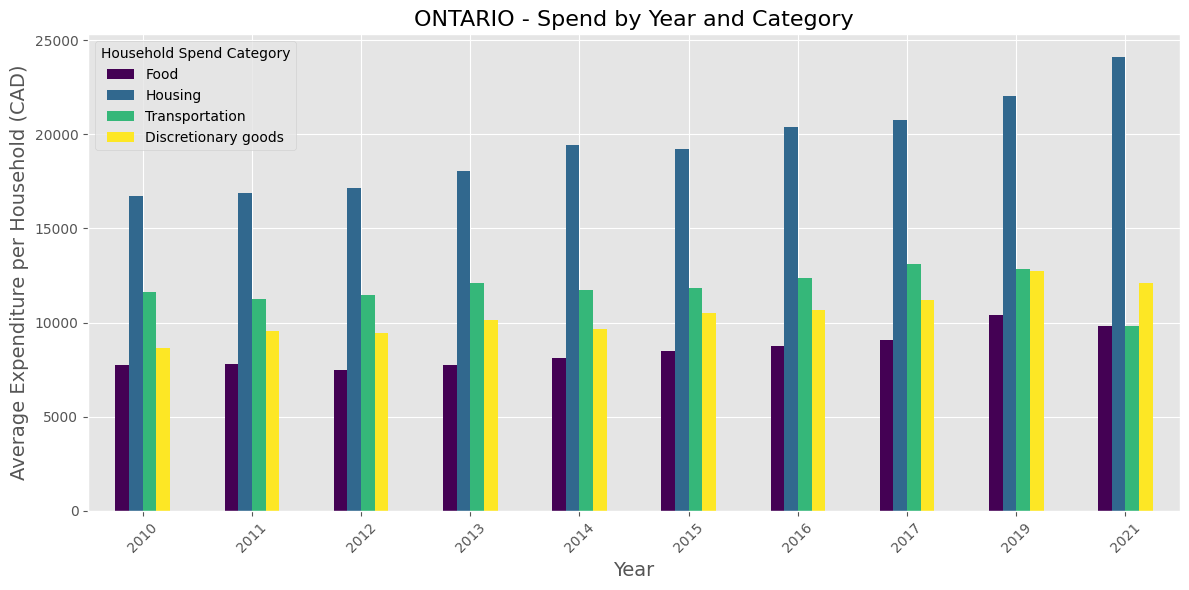

In [54]:
# Filter 'Spend: Category'
filtered_dataset_ON = dataset[dataset['Data Type'] == 'Spend: Category']

# Filter rows where 'Region' column is 'Ontario'
filtered_dataset_ON = filtered_dataset_ON[filtered_dataset_ON['Region'] == 'Ontario']

# Create pivot table
pivot_table_ON = pd.pivot_table(
    filtered_dataset_ON,
    values='Average expenditure per household (CAD)',
    index='Year',  
    columns='Household Spend Category',
    aggfunc='sum',
)

# Filter specific categories (Food, Housing, Transportation, Discretionary goods)
filtered_pivot_table_ON = pivot_table_ON[['Food', 'Housing', 'Transportation', 'Discretionary goods']]


# Reorder the columns in the specific order
column_order = ['Food', 'Housing', 'Transportation', 'Discretionary goods']
filtered_pivot_table_ON = filtered_pivot_table_ON[column_order]

# Print the final filtered pivot table
print("Filtered Pivot Table Ontario Household Spend")
print(filtered_pivot_table_ON)

# Plot the bar chart
filtered_pivot_table_ON.plot(kind='bar', figsize=(12, 6), colormap='viridis')

# Customize the plot
plt.title('ONTARIO - Spend by Year and Category', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Expenditure per Household (CAD)', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Household Spend Category', fontsize=10)

# Save the bar chart as an image file
plt.savefig('ON.png', format='png', dpi=300)

# Show the bar chart
plt.tight_layout()  # Adjust layout for better fit
plt.show()

- Ontario households allocate the largest portion of their budgets to housing, followed by transportation, with food and discretionary goods receiving relatively lower but steadily increasing allocations.
- 2010 to 2021 trends show significant increases in housing and food costs, a sharp decline in transportation spending due to reduced commuting during the pandemic, and a slight decrease in discretionary spending, reflecting economic uncertainty and a shift towards prioritizing essential needs amid inflation and the housing market pressures.

### 7.4.4 Quebec

Filtered Pivot Table Quebec Household Spend
Household Spend Category    Food  Housing  Transportation  Discretionary goods
Year                                                                          
2010                      7409.0  12022.0          9956.0               7204.0
2011                      7455.0  12186.0         10365.0               7635.0
2012                      7715.0  12564.0          9476.0               7319.0
2013                      7892.0  12782.0         10719.0               7977.0
2014                      7771.0  13186.0         10358.0               7858.0
2015                      8155.0  13475.0          9063.0               7643.0
2016                      8474.0  13972.0          9619.0               8230.0
2017                      8199.0  14555.0         10134.0               8855.0
2019                      9847.0  15822.0         10493.0              10802.0
2021                      9670.0  15847.0          9408.0              10621.0


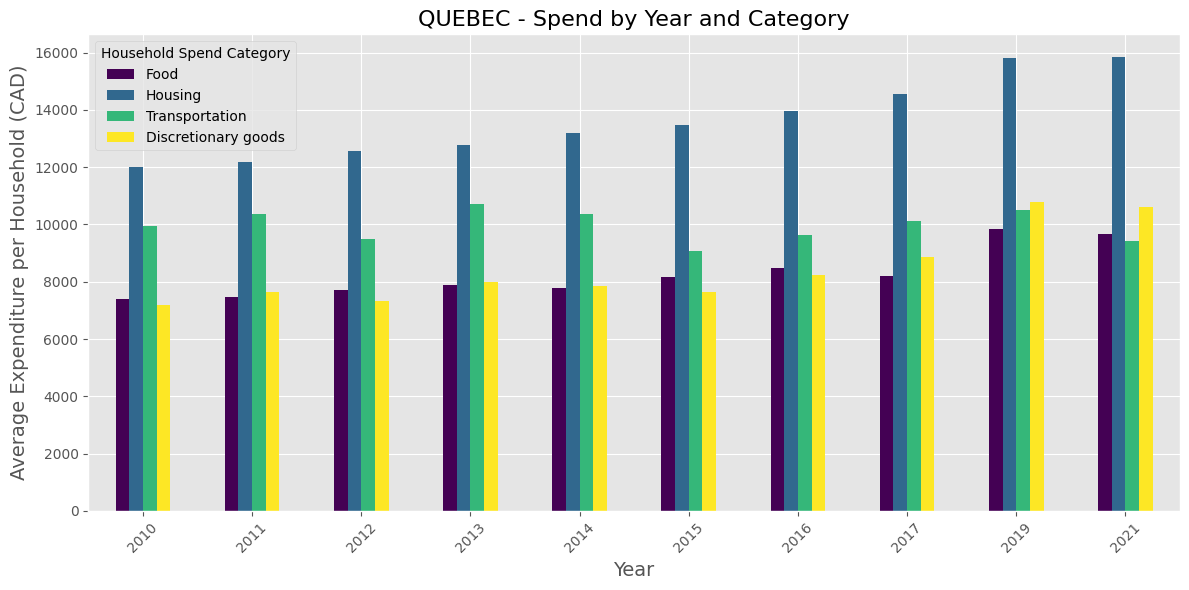

In [55]:
# Filter 'Spend: Category'
filtered_dataset_QC = dataset[dataset['Data Type'] == 'Spend: Category']

# Filter rows where 'Region' column is 'Quebec'
filtered_dataset_QC = filtered_dataset_QC[filtered_dataset_QC['Region'] == 'Quebec']

# Create pivot table
pivot_table_QC = pd.pivot_table(
    filtered_dataset_QC,
    values='Average expenditure per household (CAD)',
    index='Year',  
    columns='Household Spend Category',
    aggfunc='sum',
)

# Filter specific categories (Food, Housing, Transportation, Discretionary goods)
filtered_pivot_table_QC = pivot_table_QC[['Food', 'Housing', 'Transportation', 'Discretionary goods']]


# Reorder the columns in the specific order
column_order = ['Food', 'Housing', 'Transportation', 'Discretionary goods']
filtered_pivot_table_QC = filtered_pivot_table_QC[column_order]

# Print the final filtered pivot table
print("Filtered Pivot Table Quebec Household Spend")
print(filtered_pivot_table_QC)

# Plot the bar chart
filtered_pivot_table_QC.plot(kind='bar', figsize=(12, 6), colormap='viridis')

# Customize the plot
plt.title('QUEBEC - Spend by Year and Category', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Expenditure per Household (CAD)', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Household Spend Category', fontsize=10)

# Save the bar chart as an image file
plt.savefig('QC.png', format='png', dpi=300)

# Show the bar chart
plt.tight_layout()  # Adjust layout for better fit
plt.show()

 - In Quebec, households allocate the largest share of their budgets to housing, followed by transportation, with food and discretionary goods receiving smaller, more stable portions.
 - From 2010 to 2021, housing costs rose significantly, food spending grew steadily, transportation costs saw a slight increase before declining due to the pandemic, and discretionary spending peaked in 2019 before decreasing slightly, reflecting a shift towards essential needs amidst rising costs and economic uncertainty.

### 7.4.4 Saskatchewan

Filtered Pivot Table Saskatchewan Household Spend
Household Spend Category     Food  Housing  Transportation  \
Year                                                         
2010                       7369.0  13880.0         11616.0   
2011                       7691.0  13015.0         11292.0   
2012                       7428.0  13686.0         12171.0   
2013                       7331.0  14742.0         14285.0   
2014                       8708.0  16182.0         14051.0   
2015                       8618.0  16914.0         15237.0   
2016                       8888.0  17215.0         14522.0   
2017                       9584.0  17307.0         13522.0   
2019                      10428.0  19419.0         14038.0   
2021                      11595.0  18705.0         10708.0   

Household Spend Category  Discretionary goods  
Year                                           
2010                                   9532.0  
2011                                  10088.0  
2012         

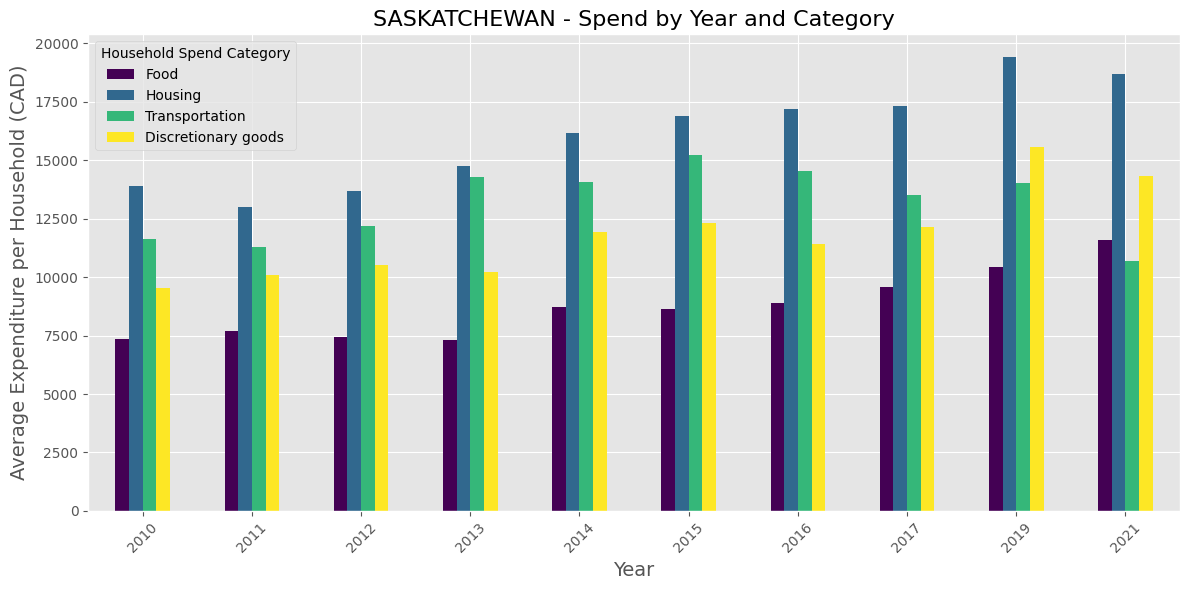

In [56]:
# Filter 'Spend: Category'
filtered_dataset_SK = dataset[dataset['Data Type'] == 'Spend: Category']

# Filter rows where 'Region' column is 'Saskatchewan'
filtered_dataset_SK = filtered_dataset_SK[filtered_dataset_SK['Region'] == 'Saskatchewan']

# Create pivot table
pivot_table_SK = pd.pivot_table(
    filtered_dataset_SK,
    values='Average expenditure per household (CAD)',
    index='Year',  
    columns='Household Spend Category',
    aggfunc='sum',
)

# Filter specific categories (Food, Housing, Transportation, Discretionary goods)
filtered_pivot_table_SK = pivot_table_SK[['Food', 'Housing', 'Transportation', 'Discretionary goods']]


# Reorder the columns in the specific order
column_order = ['Food', 'Housing', 'Transportation', 'Discretionary goods']
filtered_pivot_table_SK = filtered_pivot_table_SK[column_order]

# Print the final filtered pivot table
print("Filtered Pivot Table Saskatchewan Household Spend")
print(filtered_pivot_table_SK)

# Plot the bar chart
filtered_pivot_table_SK.plot(kind='bar', figsize=(12, 6), colormap='viridis')

# Customize the plot
plt.title('SASKATCHEWAN - Spend by Year and Category', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Expenditure per Household (CAD)', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Household Spend Category', fontsize=10)

# Save the bar chart as an image file
plt.savefig('SK.png', format='png', dpi=300)

# Show the bar chart
plt.tight_layout()  # Adjust layout for better fit
plt.show()

 - In Saskatchewan, households primarily allocate their budgets to housing, closely followed by transportation and discretionary goods, with food spending remaining lower but steady.
 - Between 2010 and 2021, housing expenses saw consistent growth, although at a slower pace compared to other provinces. Food spending rose significantly, driven by higher prices. Transportation costs initially increased, then stabilized and declined, reflecting reduced travel during the pandemic. Discretionary spending peaked in 2019 before decreasing, signaling a shift toward prioritizing essential needs due to economic uncertainty.

### 7.5 Impact of Economic Factors ( Disposable Income and Consumer Price Index)
We analyzed how Disposable Income and the Consumer Price Index (CPI) influence spending patterns across provinces and use line chars for visualization.

### 7.5.1 Alberta

    Year  Average expenditure per household (CAD)  Consumer Price Index  \
0   2010                                  89625.0            106.046575   
1   2011                                  89903.0            107.365278   
2   2012                                  97847.0            108.706757   
3   2013                                 101888.0            109.287324   
4   2014                                 100960.0            111.244286   
5   2015                                 110308.0            113.432877   
6   2016                                 106462.0            113.716418   
7   2017                                 101135.0            115.779412   
9   2019                                 113743.0            122.225000   
11  2021                                 104371.0            126.439706   

    Disposable income per household (CAD)  
0                                108076.0  
1                                110705.0  
2                                116388.0 

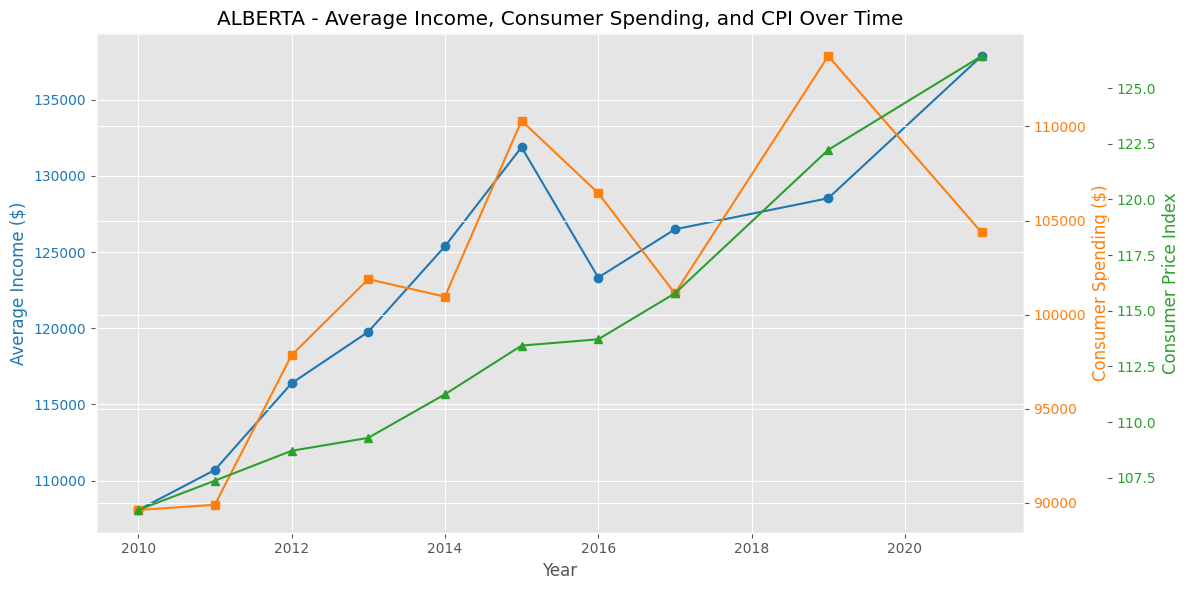

In [57]:
# Filter 'Spend: Category' and 'Income: All households' in the 'Data Type' column
filtered_dataset_Alberta = dataset[dataset['Data Type'].isin(['Spend: Category', 'Income: All households'])]

# Filter rows where 'Region' column contains 'Alberta'
filtered_dataset_Alberta = filtered_dataset_Alberta[filtered_dataset_Alberta['Region'] == 'Alberta']

# Create a pivot table for the Alberta Combo chart
pivot_table_Alberta = pd.pivot_table(
    filtered_dataset_Alberta,
    values=[
        'Average expenditure per household (CAD)', 
        'Disposable income per household (CAD)', 
        'Consumer Price Index',
    ],
    index='Year',
    aggfunc={
        'Average expenditure per household (CAD)': 'sum',
        'Disposable income per household (CAD)': 'sum',
        'Consumer Price Index': 'mean',
    }
)

# Reset the index to turn the index into a column
pivot_table_Alberta = pivot_table_Alberta.reset_index()

# Filter out the years 2018 and 2020 
pivot_table_Alberta = pivot_table_Alberta[~pivot_table_Alberta['Year'].isin([2018, 2020])]

print(pivot_table_Alberta)

# To create combo chart
df = pd.DataFrame(pivot_table_Alberta)

fig, ax1 = plt.subplots(figsize=(12, 6,))

# Plot Income on primary y-axis
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Income ($)', color='tab:blue')
ax1.plot(df['Year'], df['Disposable income per household (CAD)'], color='tab:blue', marker='o', label='Average Income')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for consumer spending
ax2 = ax1.twinx()
ax2.set_ylabel('Consumer Spending ($)', color='tab:orange')
ax2.plot(df['Year'], df['Average expenditure per household (CAD)'], color='tab:orange', marker='s', label='Consumer Spending')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Optional: Add CPI as a scatter plot
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Offset the third y-axis
ax3.set_ylabel('Consumer Price Index', color='tab:green')
ax3.plot(df['Year'], df['Consumer Price Index'], color='tab:green', marker='^', label='Inflation Rate')
ax3.tick_params(axis='y', labelcolor='tab:green')

# Title and legend
plt.title('ALBERTA - Average Income, Consumer Spending, and CPI Over Time')
fig.tight_layout()  # To prevent overlap
plt.grid()
plt.show()

 - The line chart shows the relationship between Average Income, Consumer Spending, and CPI in Alberta from 2010 to 2021. 
 - In Alberta, the relationship between income and spending is clear. For example, the 2016 oil price crash led to a drop in spending from 113,000 CAD in 2014 to 106,000 CAD in 2016. By 2021, spending rebounded to over 120,000 CAD, showcasing economic recovery. 
 - There is a notable dip in Consumer Spending around 2016 and 2020, suggesting potential economic impacts during these years. 
 - CPI steadily increased, reflecting inflation’s influence.

### 7.5.2 British Columbia

Table for British Columbia
    Year  Average expenditure per household (CAD)  Consumer Price Index  \
0   2010                                  75051.0             99.756757   
1   2011                                  75446.0            101.948649   
2   2012                                  74764.0            103.011268   
3   2013                                  79082.0            102.850000   
4   2014                                  80673.0            102.946479   
5   2015                                  85704.0            104.515278   
6   2016                                  85820.0            106.642466   
7   2017                                  92691.0            108.515068   
9   2019                                 102924.0            115.458571   
11  2021                                 101374.0            118.217143   

    Disposable income per household (CAD)  
0                                 86242.0  
1                                 87630.0  
2              

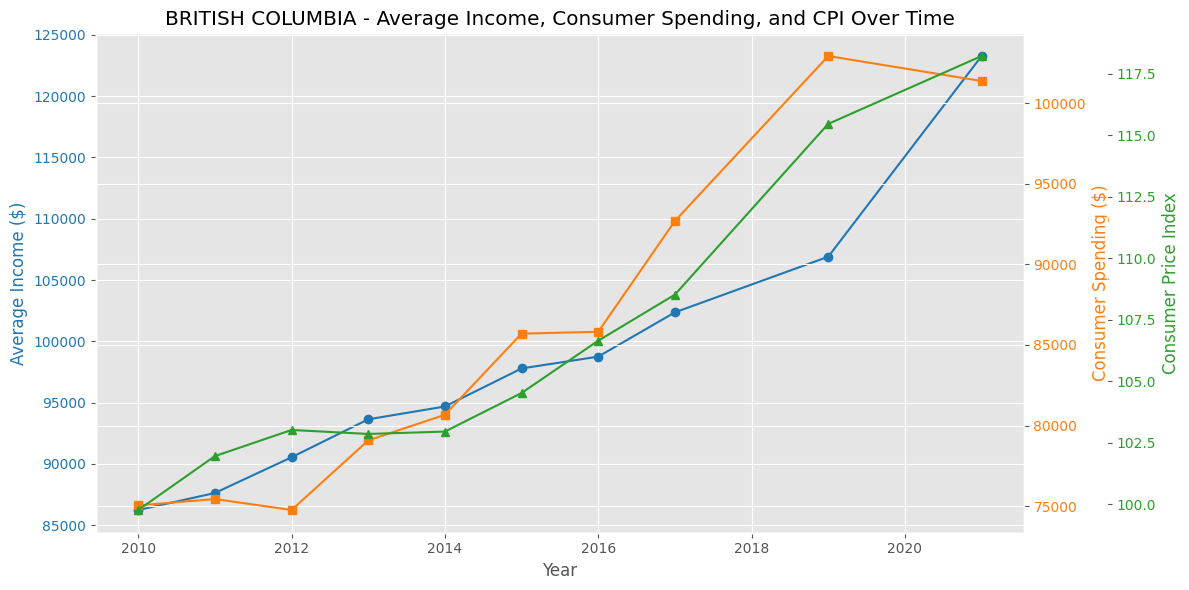

In [58]:
# Filter 'Spend: Category' and 'Income: All households' in the 'Data Type' column
filtered_dataset_bc = dataset[dataset['Data Type'].isin(['Spend: Category', 'Income: All households'])]

# Filter rows where 'Region' column is 'British Columbia'
filtered_dataset_bc = filtered_dataset_bc[filtered_dataset_bc['Region'] == 'British Columbia']

# Create a pivot table for British Columbia
pivot_table_british_columbia = pd.pivot_table(
    filtered_dataset_bc,
    values=[
        'Average expenditure per household (CAD)', 
        'Disposable income per household (CAD)', 
        'Consumer Price Index',
    ],
    index='Year',
    aggfunc={
        'Average expenditure per household (CAD)': 'sum',
        'Disposable income per household (CAD)': 'sum',
        'Consumer Price Index': 'mean',
    }
)
# Reset the index to turn the index into a column
pivot_table_british_columbia = pivot_table_british_columbia.reset_index()

# Filter out the years 2018 and 2020 
pivot_table_british_columbia = pivot_table_british_columbia[~pivot_table_british_columbia['Year'].isin([2018, 2020])]

# Print the final pivot table
print("Table for British Columbia")
print(pivot_table_british_columbia)

# To create combo chart
df = pd.DataFrame(pivot_table_british_columbia)

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Income on primary y-axis
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Income ($)', color='tab:blue')
ax1.plot(df['Year'], df['Disposable income per household (CAD)'], color='tab:blue', marker='o', label='Average Income')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for consumer spending
ax2 = ax1.twinx()
ax2.set_ylabel('Consumer Spending ($)', color='tab:orange')
ax2.plot(df['Year'], df['Average expenditure per household (CAD)'], color='tab:orange', marker='s', label='Consumer Spending')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Optional: Add CPI as a scatter plot
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Offset the third y-axis
ax3.set_ylabel('Consumer Price Index', color='tab:green')
ax3.plot(df['Year'], df['Consumer Price Index'], color='tab:green', marker='^', label='Inflation Rate')
ax3.tick_params(axis='y', labelcolor='tab:green')

# Title and legend
plt.title('BRITISH COLUMBIA - Average Income, Consumer Spending, and CPI Over Time')
fig.tight_layout()  # To prevent overlap
plt.grid()
plt.show()

 - In British Columbia, both income and spending showed consistent growth, with spending rising from 75,000 CAD in 2010 to 101,000 CAD in 2021. 
 - The parallel growth in income and spending, along with inflation, indicates a stable economic environment, supported by modest inflation.

### 7.5.3 Ontario

Table for Ontario
    Year  Average expenditure per household (CAD)  Consumer Price Index  \
0   2010                                  75975.0            100.710526   
1   2011                                  77443.0            103.597403   
2   2012                                  79264.0            104.087671   
3   2013                                  82688.0            105.346575   
4   2014                                  84437.0            107.608219   
5   2015                                  85481.0            108.231169   
6   2016                                  89065.0            109.801333   
7   2017                                  90586.0            111.780822   
9   2019                                  98090.0            118.805882   
11  2021                                  98241.0            122.965278   

    Disposable income per household (CAD)  
0                                 90605.0  
1                                 92130.0  
2                       

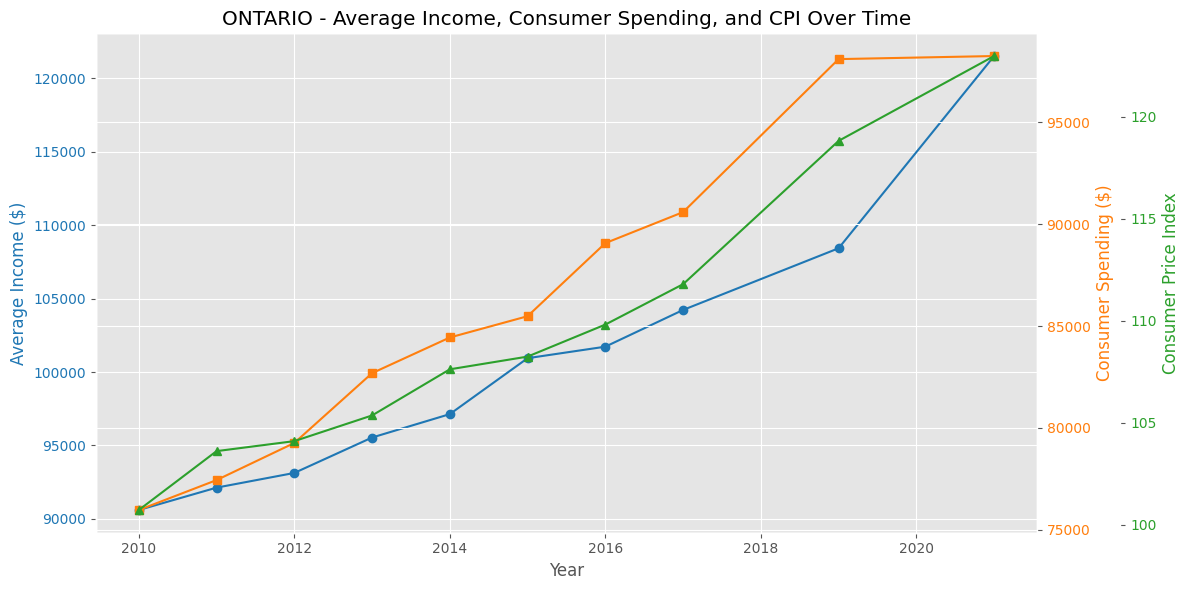

In [59]:
# Filter 'Spend: Category' and 'Income: All households' in the 'Data Type' column
filtered_dataset_Ontario = dataset[dataset['Data Type'].isin(['Spend: Category', 'Income: All households'])]

# Filter rows where 'Region' column is 'Ontario'
filtered_dataset_Ontario = filtered_dataset_Ontario[filtered_dataset_Ontario['Region'] == 'Ontario']

# Create a pivot table for Ontario
pivot_table_ontario = pd.pivot_table(
    filtered_dataset_Ontario,
    values=[
        'Average expenditure per household (CAD)', 
        'Disposable income per household (CAD)', 
        'Consumer Price Index',
    ],
    index='Year',
    aggfunc={
        'Average expenditure per household (CAD)': 'sum',
        'Disposable income per household (CAD)': 'sum',
        'Consumer Price Index': 'mean',
    }
)

# Reset the index to turn the index into a column
pivot_table_ontario = pivot_table_ontario.reset_index()

# Filter out the years 2018 and 2020 
pivot_table_ontario = pivot_table_ontario[~pivot_table_ontario['Year'].isin([2018, 2020])]

# Print the final pivot table
print("Table for Ontario")
print(pivot_table_ontario)

# To create combo chart
df = pd.DataFrame(pivot_table_ontario)

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Income on primary y-axis
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Income ($)', color='tab:blue')
ax1.plot(df['Year'], df['Disposable income per household (CAD)'], color='tab:blue', marker='o', label='Average Income')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for consumer spending
ax2 = ax1.twinx()
ax2.set_ylabel('Consumer Spending ($)', color='tab:orange')
ax2.plot(df['Year'], df['Average expenditure per household (CAD)'], color='tab:orange', marker='s', label='Consumer Spending')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Optional: Add CPI as a scatter plot
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Offset the third y-axis
ax3.set_ylabel('Consumer Price Index', color='tab:green')
ax3.plot(df['Year'], df['Consumer Price Index'], color='tab:green', marker='^', label='Inflation Rate')
ax3.tick_params(axis='y', labelcolor='tab:green')

# Title and legend
plt.title('ONTARIO - Average Income, Consumer Spending, and CPI Over Time')
fig.tight_layout()  # To prevent overlap
plt.grid()
plt.show()

 - Ontario followed a similar upward trend, with spending increasing from 76,000 CAD in 2010 to 98,000 CAD in 2021.
 - However, rising CPI hints at inflationary pressures affecting household budgets.

### 7.5.4 Quebec

Table for Quebec
    Year  Average expenditure per household (CAD)  Consumer Price Index  \
0   2010                                  62878.0             97.816438   
1   2011                                  65152.0            100.837838   
2   2012                                  65236.0            102.822973   
3   2013                                  69072.0            103.473611   
4   2014                                  68961.0            103.991781   
5   2015                                  68197.0            105.045205   
6   2016                                  70739.0            105.661644   
7   2017                                  73558.0            106.474648   
9   2019                                  81073.0            113.004167   
11  2021                                  81733.0            117.440000   

    Disposable income per household (CAD)  
0                                 70406.0  
1                                 72058.0  
2                        

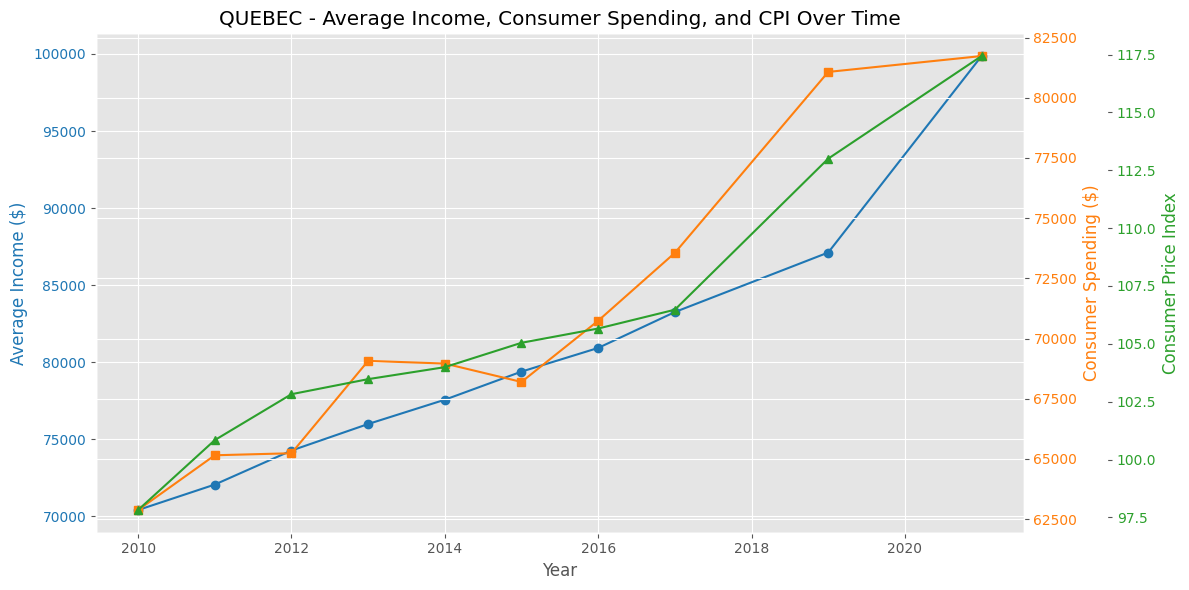

In [60]:
# Filter 'Spend: Category' and 'Income: All households' in the 'Data Type' column
filtered_dataset_Quebec = dataset[dataset['Data Type'].isin(['Spend: Category', 'Income: All households'])]

# Filter rows where 'Region' column is 'Quebec'
filtered_dataset_Quebec = filtered_dataset_Quebec[filtered_dataset_Quebec['Region'] == 'Quebec']

# Create a pivot table for Quebec
pivot_table_quebec = pd.pivot_table(
    filtered_dataset_Quebec,
    values=[
        'Average expenditure per household (CAD)', 
        'Disposable income per household (CAD)', 
        'Consumer Price Index',
    ],
    index='Year',
    aggfunc={
        'Average expenditure per household (CAD)': 'sum',
        'Disposable income per household (CAD)': 'sum',
        'Consumer Price Index': 'mean',
    }
)

# Reset the index to turn the index into a column
pivot_table_quebec = pivot_table_quebec.reset_index()

# Filter out the years 2018 and 2020 
pivot_table_quebec = pivot_table_quebec[~pivot_table_quebec['Year'].isin([2018, 2020])]

# Print the final pivot table
print("Table for Quebec")
print(pivot_table_quebec)

# To create combo chart
df = pd.DataFrame(pivot_table_quebec)

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Income on primary y-axis
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Income ($)', color='tab:blue')
ax1.plot(df['Year'], df['Disposable income per household (CAD)'], color='tab:blue', marker='o', label='Average Income')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for consumer spending
ax2 = ax1.twinx()
ax2.set_ylabel('Consumer Spending ($)', color='tab:orange')
ax2.plot(df['Year'], df['Average expenditure per household (CAD)'], color='tab:orange', marker='s', label='Consumer Spending')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Optional: Add CPI as a scatter plot
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Offset the third y-axis
ax3.set_ylabel('Consumer Price Index', color='tab:green')
ax3.plot(df['Year'], df['Consumer Price Index'], color='tab:green', marker='^', label='Inflation Rate')
ax3.tick_params(axis='y', labelcolor='tab:green')

# Title and legend
plt.title('QUEBEC - Average Income, Consumer Spending, and CPI Over Time')
fig.tight_layout()  # To prevent overlap
plt.grid()
plt.show()

 - In Quebec, spending patterns were more conservative, growing from 63,000 CAD in 2010 to 81,000 CAD in 2021. 
 - This slower pace may reflect cultural or structural factors unique to the region.


### 7.5.5 Saskatchewan

Table for Saskatchewan
    Year  Average expenditure per household (CAD)  Consumer Price Index  \
0   2010                                  70826.0            102.634247   
1   2011                                  71125.0            103.821918   
2   2012                                  75473.0            105.342029   
3   2013                                  79768.0            107.365714   
4   2014                                  85024.0            109.973846   
5   2015                                  89737.0            110.717391   
6   2016                                  89234.0            111.654286   
7   2017                                  88346.0            114.188732   
9   2019                                  97446.0            121.235294   
11  2021                                  92307.0            122.246154   

    Disposable income per household (CAD)  
0                                 89724.0  
1                                 94718.0  
2                  

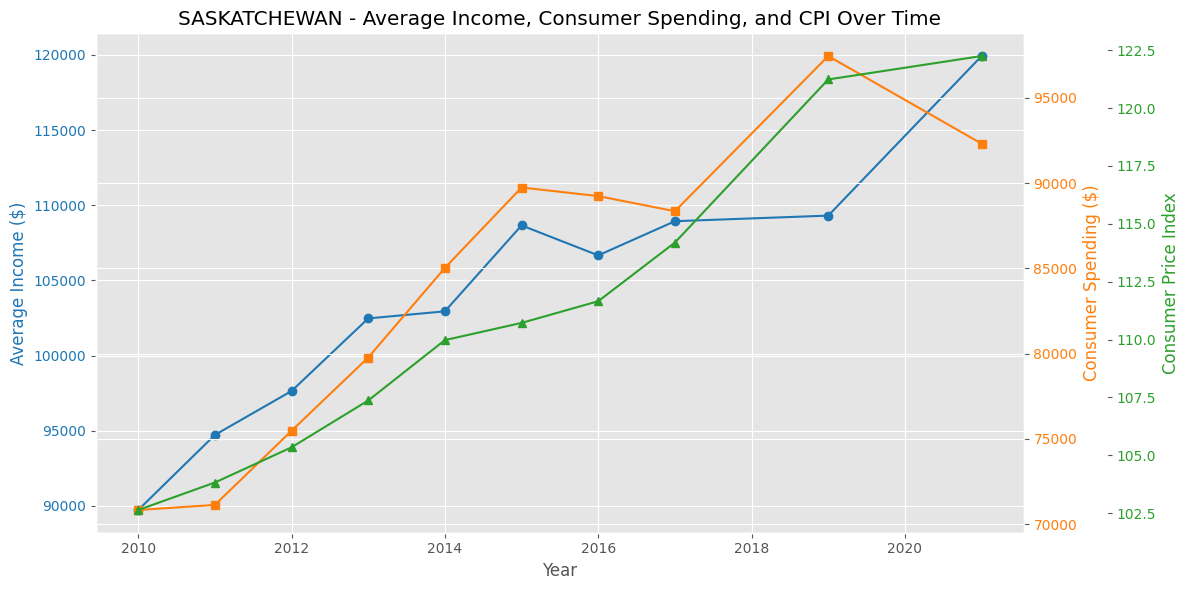

In [61]:
# Filter 'Spend: Category' and 'Income: All households' in the 'Data Type' column
filtered_dataset_saskatchewan = dataset[dataset['Data Type'].isin(['Spend: Category', 'Income: All households'])]

# Filter rows where 'Region' column is 'Saskatchewan'
filtered_dataset_saskatchewan = filtered_dataset_saskatchewan[filtered_dataset_saskatchewan['Region'] == 'Saskatchewan']

# Create a pivot table for Saskatchewan
pivot_table_saskatchewan = pd.pivot_table(
    filtered_dataset_saskatchewan,
    values=[
        'Average expenditure per household (CAD)', 
        'Disposable income per household (CAD)', 
        'Consumer Price Index',
    ],
    index='Year',
    aggfunc={
        'Average expenditure per household (CAD)': 'sum',
        'Disposable income per household (CAD)': 'sum',
        'Consumer Price Index': 'mean',
    }
)

# Reset the index to turn the index into a column
pivot_table_saskatchewan = pivot_table_saskatchewan.reset_index()

# Filter out the years 2018 and 2020 
pivot_table_saskatchewan = pivot_table_saskatchewan[~pivot_table_saskatchewan['Year'].isin([2018, 2020])]

# Print the final pivot table
print("Table for Saskatchewan")
print(pivot_table_saskatchewan)

# To create combo chart
df = pd.DataFrame(pivot_table_saskatchewan)

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Income on primary y-axis
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Income ($)', color='tab:blue')
ax1.plot(df['Year'], df['Disposable income per household (CAD)'], color='tab:blue', marker='o', label='Average Income')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for consumer spending
ax2 = ax1.twinx()
ax2.set_ylabel('Consumer Spending ($)', color='tab:orange')
ax2.plot(df['Year'], df['Average expenditure per household (CAD)'], color='tab:orange', marker='s', label='Consumer Spending')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Optional: Add CPI as a scatter plot
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Offset the third y-axis
ax3.set_ylabel('Consumer Price Index', color='tab:green')
ax3.plot(df['Year'], df['Consumer Price Index'], color='tab:green', marker='^', label='Inflation Rate')
ax3.tick_params(axis='y', labelcolor='tab:green')

# Title and legend
plt.title('SASKATCHEWAN - Average Income, Consumer Spending, and CPI Over Time')
fig.tight_layout()  # To prevent overlap
plt.grid()
plt.show()

 - Finally, in Saskatchewan, spending fluctuated with economic cycles, particularly in 2016, due to its reliance on agriculture. 
 - Nonetheless, income and CPI steadily increased over the period.

### 7.6 Impact of Demographic Factors (Age Groups, Household Type and Income Quintile)
Shifting to demographic factors, we explored the role of age groups, household types, and income quintiles in shaping spending behavior, visualizing these with stacked bar charts.

### 7.6.1 Age Groups

Filtered Pivot Table by Age Group and Household Spend Category
Household Spend Category      Food   Housing  Transportation  \
Less than 30 years         73288.0  162942.0        111870.0   
30 to 39 years             94019.0  209354.0        127737.0   
40 to 54 years            102291.0  210565.0        141691.0   
55 to 64 years             87273.0  162209.0        121484.0   
65 years and over          66121.0  118712.0         75182.0   

Household Spend Category  Discretionary goods  
Less than 30 years                    77762.0  
30 to 39 years                        97697.0  
40 to 54 years                       117883.0  
55 to 64 years                       115834.0  
65 years and over                     88681.0  


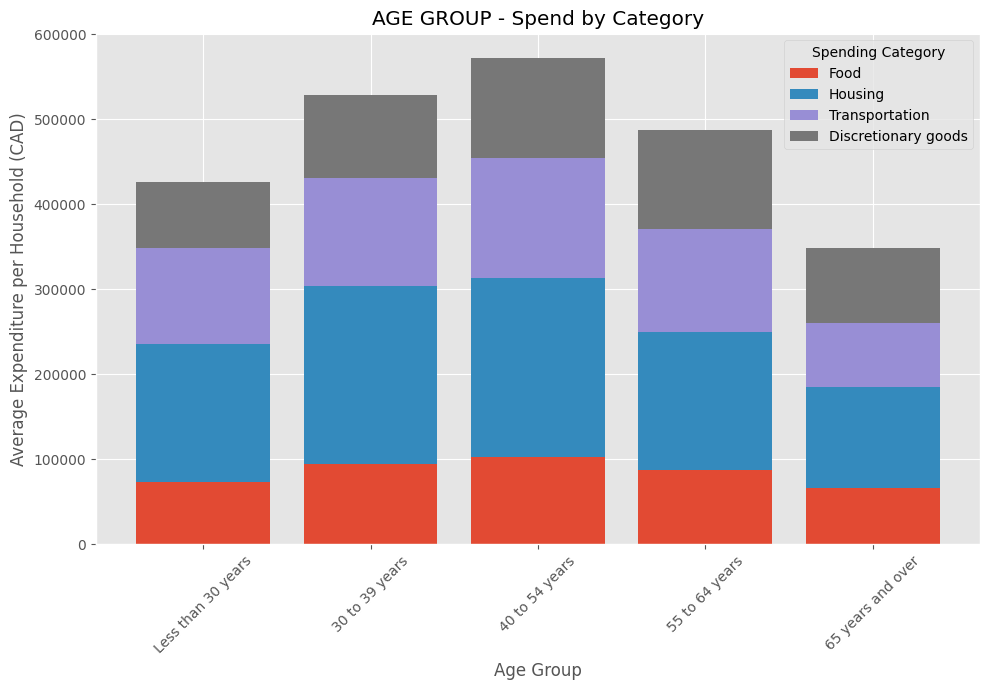

In [62]:
# Filter 'Spend: Age'
filtered_dataset_age = dataset[dataset['Data Type'] == 'Spend: Age']

# Filter rows where 'Region' column is 'Canada'
filtered_dataset_age = filtered_dataset_age[filtered_dataset_age['Region'] == 'Canada']

# Create pivot table
pivot_table_age = pd.pivot_table(
    filtered_dataset_age,
    values='Average expenditure per household (CAD)',
    index='Age Group', 
    columns='Household Spend Category', 
    aggfunc='sum',
    margins=True,  
    margins_name='Grand Total'
)

# Filter specific categories (Food, Housing, Transportation, Discretionary goods)
filtered_pivot_table_age = pivot_table_age[['Food', 'Housing', 'Transportation', 'Discretionary goods']]

# Filter out rows where index is 'All ages' or 'Grand Total'
filtered_pivot_table_age = filtered_pivot_table_age[~filtered_pivot_table_age.index.isin(['All ages', 'Grand Total'])]

# Reorder the age groups
desired_order = ['Less than 30 years', '30 to 39 years', '40 to 54 years', '55 to 64 years', '65 years and over']
filtered_pivot_table_age.index = pd.Categorical(filtered_pivot_table_age.index, categories=desired_order, ordered=True)
filtered_pivot_table_age = filtered_pivot_table_age.sort_index()

# Print the final filtered pivot table
print("Filtered Pivot Table by Age Group and Household Spend Category")
print(filtered_pivot_table_age)

# Define the age groups and spending categories
age_groups = filtered_pivot_table_age.index
categories = ['Food', 'Housing', 'Transportation', 'Discretionary goods']

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 7))

# Initialize the bottom variable to keep track of the previous bars
bottom = None

# Loop through each category to create stacked bars
for category in categories:
    if bottom is None:
        ax.bar(age_groups, filtered_pivot_table_age[category], label=category)
        bottom = filtered_pivot_table_age[category]
    else:
        ax.bar(age_groups, filtered_pivot_table_age[category], bottom=bottom, label=category)
        bottom += filtered_pivot_table_age[category]

# Add labels and title
ax.set_xlabel('Age Group')
ax.set_ylabel('Average Expenditure per Household (CAD)')
ax.set_title('AGE GROUP - Spend by Category')

# Rotate x-ticks for better readability
plt.xticks(rotation=45)

# Add a legend to show which color represents which category
ax.legend(title='Spending Category')

# Display the plot
plt.tight_layout()
plt.show()

 - Across all age groups, housing consistently accounts for the largest share of expenditures, followed by transportation, with discretionary goods and food receiving smaller portions.
 - Spending begins at lower levels among younger households (under 30), reflecting lower incomes and peaks among middle-aged households (30 to 54), driven by peak earning potential and larger family and career responsibilities, then declines all categories for older households (55 and above), particularly in transportation and discretionary goods, as mobility needs and consumption priorities shift towards essentials. Housing remains a major expense but is lower compared to younger households, likely due to reduced mortgage obligations or downsizing.
 - It is concluded that spending patterns align with life stages, with younger households focusing on mobility and older households shifting toward essential needs.

### 7.6.2 Household Type

Filtered Pivot Table by Household Type and Household Spend Category
Household Spend Category                             Food   Housing  \
Single person                                     47096.0  118851.0   
Lone-parent  with no additional persons           79051.0  152262.0   
Couples without children                          87970.0  164262.0   
Couples with children                            122240.0  234674.0   
Couples with other related or unrelated persons  119600.0  242979.0   

Household Spend Category                         Transportation  \
Single person                                           55067.0   
Lone-parent  with no additional persons                 90894.0   
Couples without children                               121047.0   
Couples with children                                  169657.0   
Couples with other related or unrelated persons        187148.0   

Household Spend Category                         Discretionary goods  
Single person                  

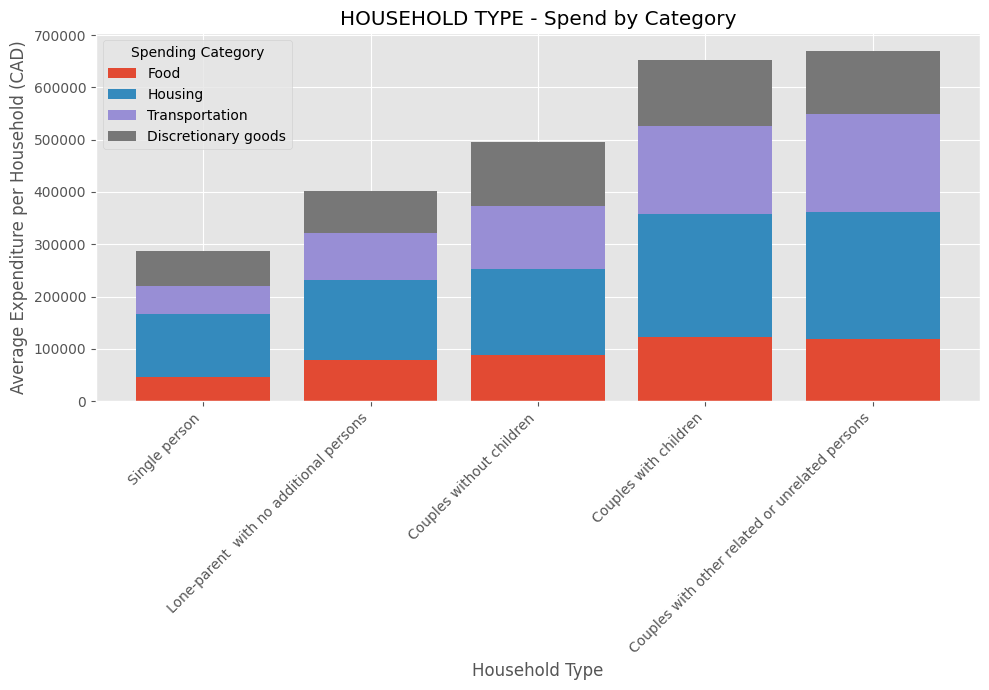

In [63]:
# Filter 'Spend: Household Type'
filtered_dataset_household_type = dataset[dataset['Data Type'] == 'Spend: Household Type']

# Filter rows where 'Region' column is 'Canada'
filtered_dataset_household_type = filtered_dataset_household_type[filtered_dataset_household_type['Region'] == 'Canada']

# Create pivot table
pivot_table_household_type = pd.pivot_table(
    filtered_dataset_household_type,
    values='Average expenditure per household (CAD)',
    index='Household Type',  
    columns='Household Spend Category', 
    aggfunc='sum',
    margins=True,  # Add the Grand Total row/column
    margins_name='Grand Total'
)

# Filter specific categories (Food, Housing, Transportation, Discretionary goods)
filtered_pivot_table_household_type = pivot_table_household_type[['Food', 'Housing', 'Transportation', 'Discretionary goods']]

# Filter out rows where index is 'All types' or 'Grand Total'
filtered_pivot_table_household_type = filtered_pivot_table_household_type[~filtered_pivot_table_household_type.index.isin(['All types', 'Grand Total', 'Others  with related or unrelated persons'])]

# Reorder the household type
desired_order = ['Single person', 'Lone-parent  with no additional persons', 'Couples without children', 'Couples with children', 'Couples with other related or unrelated persons']
filtered_pivot_table_household_type.index = pd.Categorical(filtered_pivot_table_household_type.index, categories=desired_order, ordered=True)
filtered_pivot_table_household_type = filtered_pivot_table_household_type.sort_index()

# Print the final filtered pivot table
print("Filtered Pivot Table by Household Type and Household Spend Category")
print(filtered_pivot_table_household_type)

# Define the household type and spending categories
household_type = filtered_pivot_table_household_type.index
categories = ['Food', 'Housing', 'Transportation', 'Discretionary goods']

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 7))

# Initialize the bottom variable to keep track of the previous bars
bottom = None

# Loop through each category to create stacked bars
for category in categories:
    if bottom is None:
        ax.bar(household_type, filtered_pivot_table_household_type[category], label=category)
        bottom = filtered_pivot_table_household_type[category]
    else:
        ax.bar(household_type, filtered_pivot_table_household_type[category], bottom=bottom, label=category)
        bottom += filtered_pivot_table_household_type[category]

# Add labels and title
ax.set_xlabel('Household Type')
ax.set_ylabel('Average Expenditure per Household (CAD)')
ax.set_title('HOUSEHOLD TYPE - Spend by Category')

# Rotate x-ticks for better readability and align them
plt.xticks(rotation=45, ha='right')  # ha='right' aligns the text to the right

# Add a legend to show which color represents which category
ax.legend(title='Spending Category')

# Display the plot
plt.tight_layout()
plt.show()



 - Looking at household types, it is clearly seen that, As household size and complexity grow, spending rises accordingly.
 - Single-person households allocated a larger share of their budgets to discretionary goods compared to transportation and food. In contrast, couples with children or dependents spent significantly more overall, especially on housing and transportation, due to family-related costs.
 - Couples with children and households that include additional members face the highest expenses across all categories. 
 - Housing is consistently the largest expense, while discretionary spending varies based on the household's composition and priorities. This is especially noticeable in single-person households, where discretionary spending exceeds both transportation and food costs.

### 7.6.3 Income Quintile

Filtered Pivot Table by Income Quintile and Household Spend Category
Household Spend Category      Food   Housing  Transportation  \
Lowest quintile            47847.0  104030.0         46715.0   
Second quintile            66134.0  128882.0         75577.0   
Third quintile             82556.0  160192.0        111205.0   
Fourth quintile           102236.0  201402.0        145047.0   
Highest quintile          132647.0  275463.0        203500.0   

Household Spend Category  Discretionary goods  
Lowest quintile                       44371.0  
Second quintile                       66622.0  
Third quintile                        91929.0  
Fourth quintile                      121434.0  
Highest quintile                     190921.0  


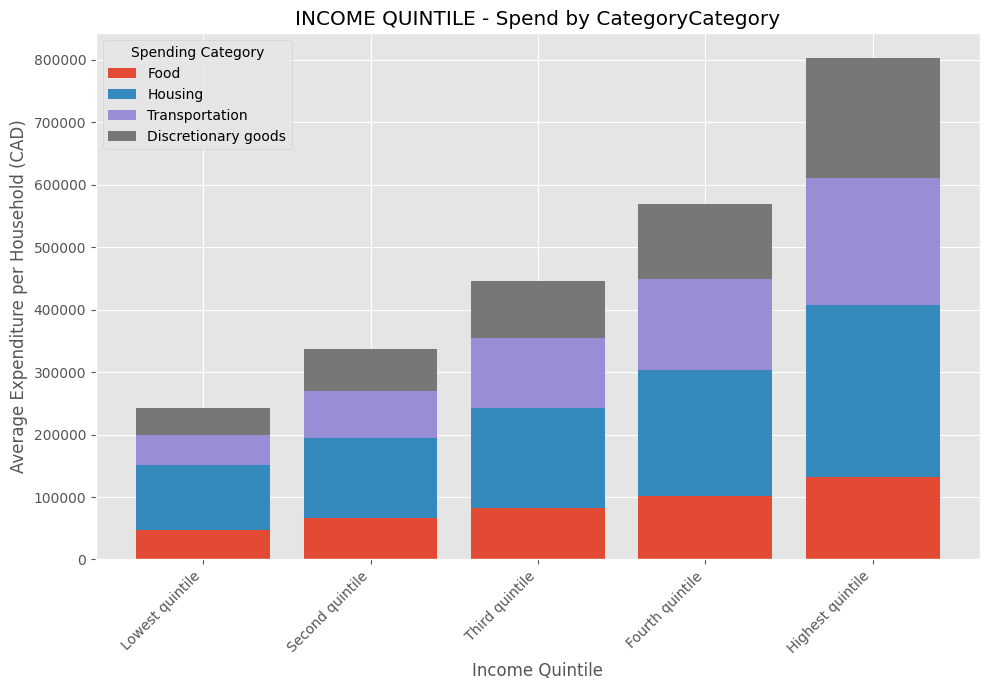

In [64]:
# Filter 'Spend: Income Quintile'
filtered_dataset_income_quintile = dataset[dataset['Data Type'] == 'Spend: Income Quintile']

# Filter rows where 'Region' column is 'Canada'
filtered_dataset_income_quintile = filtered_dataset_income_quintile[filtered_dataset_income_quintile['Region'] == 'Canada']

# Create pivot table
pivot_table_income_quintile = pd.pivot_table(
    filtered_dataset_income_quintile,
    values='Average expenditure per household (CAD)',
    index='Income Quintile',  
    columns='Household Spend Category', 
    aggfunc='sum',
    margins=True,  # Add the Grand Total row/column
    margins_name='Grand Total'
)

# Filter specific categories (Food, Housing, Transportation, Discretionary goods)
filtered_pivot_table_income_quintile = pivot_table_income_quintile[['Food', 'Housing', 'Transportation', 'Discretionary goods']]

# Filter out rows where index is 'All quintiles' or 'Grand Total'
filtered_pivot_table_income_quintile = filtered_pivot_table_income_quintile[~filtered_pivot_table_income_quintile.index.isin(['All quintiles', 'Grand Total'])]

# Reorder the income quintile
desired_order = [
    'Lowest quintile',
    'Second quintile',
    'Third quintile',
    'Fourth quintile',
    'Highest quintile',
]

# Set the index as a categorical variable with the specified order
filtered_pivot_table_income_quintile.index = pd.Categorical(
    filtered_pivot_table_income_quintile.index,
    categories=desired_order,
    ordered=True
)
filtered_pivot_table_income_quintile = filtered_pivot_table_income_quintile.sort_index()

# Print the final filtered pivot table
print("Filtered Pivot Table by Income Quintile and Household Spend Category")
print(filtered_pivot_table_income_quintile)

# Define the income quintile and spending categories
income_quintile = filtered_pivot_table_income_quintile.index
categories = ['Food', 'Housing', 'Transportation', 'Discretionary goods']

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 7))

# Initialize the bottom variable to keep track of the previous bars
bottom = None

# Loop through each category to create stacked bars
for category in categories:
    if bottom is None:
        ax.bar(income_quintile, filtered_pivot_table_income_quintile[category], label=category)
        bottom = filtered_pivot_table_income_quintile[category]
    else:
        ax.bar(income_quintile, filtered_pivot_table_income_quintile[category], bottom=bottom, label=category)
        bottom += filtered_pivot_table_income_quintile[category]

# Add labels and title
ax.set_xlabel('Income Quintile')
ax.set_ylabel('Average Expenditure per Household (CAD)')
ax.set_title('INCOME QUINTILE - Spend by CategoryCategory')

# Rotate x-ticks for better readability and align them
plt.xticks(rotation=45, ha='right')  # ha='right' aligns the text to the right

# Add a legend to show which color represents which category
ax.legend(title='Spending Category')

# Display the plot
plt.tight_layout()
plt.show()

 - As income increases from the Lowest Quintile to the Highest Quintile, total household expenditure also rises significantly. This trend suggests that higher income levels enable greater spending flexibility across all categories. 
 - Higher-income households allocate more to Discretionary Goods compared to lower-income households, indicating a greater capacity for non-essential spending as income increases.
 - Lower-income households, on the other hand,  focus more on basic needs, with their spending on food and housing consuming a larger share of their total budget.                                                                                                                                                                                                                                                                  

### 7.7 Box Plot Analysis of Key Spending Categories by Province
We used a box plots to further analyze regional differences in different household spending categories, highlighting the variation and distribution of expenditures across provinces.

### 7.7.1 Food

Table for Food
Region  Alberta  British Columbia  Ontario  Quebec  Saskatchewan
Year                                                            
2010     8887.0            8732.0   7737.0  7409.0        7369.0
2011     8559.0            8121.0   7799.0  7455.0        7691.0
2012     8457.0            8438.0   7463.0  7715.0        7428.0
2013     9328.0            8118.0   7751.0  7892.0        7331.0
2014     8740.0            8218.0   8103.0  7771.0        8708.0
2015    10170.0            9168.0   8475.0  8155.0        8618.0
2016     9766.0            9139.0   8747.0  8474.0        8888.0
2017     9864.0            9735.0   9099.0  8199.0        9584.0
2019    11322.0           10639.0  10419.0  9847.0       10428.0
2021    11808.0           11283.0   9794.0  9670.0       11595.0


<Figure size 1200x600 with 0 Axes>

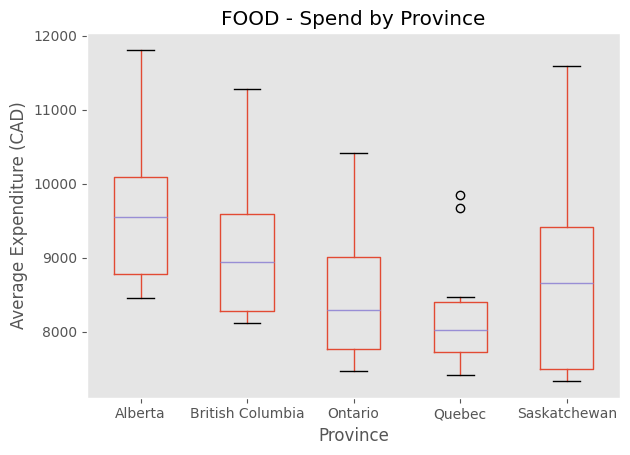

In [65]:
# 2.5 Regional Differences on Household Spending

# 2.5.1 FOOD EXPENDITURE - Regional Differences

# Filter 'Spend: Category'
filtered_data_food = dataset[dataset['Data Type'] == 'Spend: Category']

# Filter rows where 'Household Spend Category' column is 'Food'
filtered_data_food = filtered_data_food[filtered_data_food['Household Spend Category'] == 'Food']

# Create a pivot table for the average expenditures by province and year
pivot_table_food = pd.pivot_table(
    filtered_data_food,
    values='Average expenditure per household (CAD)',
    index='Year',  
    columns='Region',  
    aggfunc='sum' 
)
# Filter specific provinces (Alberta, BC, Ontario, Quebec, Saskatchewan)
filtered_pivot_table_food = pivot_table_food[['Alberta', 'British Columbia', 'Ontario', 'Quebec', 'Saskatchewan']]

# Print the final table for Food
print("Table for Food")
print(filtered_pivot_table_food)

# Reset the index to convert 'Year' from index to a column
filtered_pivot_table_food.reset_index(inplace=True)

# Melt the DataFrame to long format for plotting
df_melted = filtered_pivot_table_food.melt(id_vars=['Year'], var_name='Region', value_name='Average expenditure per household (CAD)')

# Create the box plot
plt.figure(figsize=(12, 6))
df_melted.boxplot(column='Average expenditure per household (CAD)', by='Region', grid=False, showfliers=True)

# Customize the plot
plt.title('FOOD - Spend by Province')
plt.suptitle('')  # Remove automatic "Boxplot grouped by" title
plt.xlabel('Province')
plt.ylabel('Average Expenditure (CAD)')

# Save the box plot as an image file
plt.savefig('food_expenditure_boxplot.png', format='png', dpi=300)

# Show the box plot
plt.tight_layout()  # Adjust layout for better fit
plt.show()

 - Alberta and Saskatchewan show a higher median food expenditure and wider variability, indicating a greater range in spending levels within these provinces likely due to factors like income variations, economic cycles, regional cost-of-living differences, and lifestyle choices.
 - British Columbia and Ontario have moderate food spending levels with less variability reflecting stable economies, higher average incomes, and urbanized populations while Quebec exhibits the lowest median food expenditure with relatively tight distribution, suggesting more consistent spending patterns resulting from a more conservative spending culture, lower cost of living, and regional economic conditions. 
 - The presence of outliers in some provinces, such as Quebec, may indicate occasional deviations from typical spending trends.

### 7.7.2 Housing

Table for Housing
Region  Alberta  British Columbia  Ontario   Quebec  Saskatchewan
Year                                                             
2010    17415.0           16954.0  16717.0  12022.0       13880.0
2011    18618.0           16625.0  16880.0  12186.0       13015.0
2012    19227.0           18221.0  17132.0  12564.0       13686.0
2013    19397.0           18888.0  18039.0  12782.0       14742.0
2014    20486.0           18462.0  19408.0  13186.0       16182.0
2015    21600.0           19923.0  19198.0  13475.0       16914.0
2016    21314.0           19405.0  20388.0  13972.0       17215.0
2017    20970.0           21757.0  20776.0  14555.0       17307.0
2019    22410.0           23874.0  22040.0  15822.0       19419.0
2021    23050.0           24596.0  24100.0  15847.0       18705.0


<Figure size 1200x600 with 0 Axes>

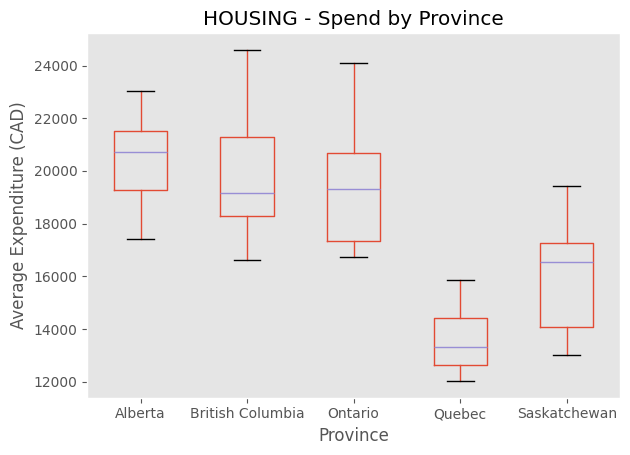

In [66]:
# Filter 'Spend: Category'
filtered_data_housing = dataset[dataset['Data Type'] == 'Spend: Category']

# Filter rows where 'Household Spend Category' column is 'Housing'
filtered_data_housing = filtered_data_housing[filtered_data_housing['Household Spend Category'] == 'Housing']

# Create a pivot table for the average expenditures by province and year
pivot_table_housing = pd.pivot_table(
    filtered_data_housing,
    values='Average expenditure per household (CAD)',
    index='Year',  
    columns='Region',  
    aggfunc='sum' 
)
# Filter specific provinces (Alberta, BC, Ontario, Quebec, Saskatchewan)
filtered_pivot_table_housing = pivot_table_housing[['Alberta', 'British Columbia', 'Ontario', 'Quebec', 'Saskatchewan']]

# Print the final table for Housing
print("Table for Housing")
print(filtered_pivot_table_housing)

# Reset the index to convert 'Year' from index to a column
filtered_pivot_table_housing.reset_index(inplace=True)

# Melt the DataFrame to long format for plotting
df_melted = filtered_pivot_table_housing.melt(id_vars=['Year'], var_name='Region', value_name='Average expenditure per household (CAD)')

# Create the box plot
plt.figure(figsize=(12, 6))
df_melted.boxplot(column='Average expenditure per household (CAD)', by='Region', grid=False, showfliers=True)

# Customize the plot
plt.title('HOUSING - Spend by Province')
plt.suptitle('')  # Remove automatic "Boxplot grouped by" title
plt.xlabel('Province')
plt.ylabel('Average Expenditure (CAD)')

# Save the box plot as an image file
plt.savefig('housing_expenditure_boxplot.png', format='png', dpi=300)

# Show the box plot
plt.tight_layout()  # Adjust layout for better fit
plt.show()

 - Ontario and Alberta have the highest median housing expenditures, with Ontario showing a slightly wider variability in spending. 
 - British Columbia also has relatively high housing costs with moderate variability. 
 - In contrast, Quebec exhibits the lowest median housing expenditure with a tightly clustered distribution, indicating more consistent spending on housing. 
 - Saskatchewan shows moderate housing expenditures with a slightly broader range. 
 - This plot highlights significant regional differences in housing spending, with Ontario, Alberta, and British Columbia generally spending more on housing than Quebec and Saskatchewan.

### 7.7.3 Transportation

Table for Transportation
Region  Alberta  British Columbia  Ontario   Quebec  Saskatchewan
Year                                                             
2010    12857.0           11267.0  11646.0   9956.0       11616.0
2011    13763.0           11046.0  11264.0  10365.0       11292.0
2012    14680.0           10448.0  11470.0   9476.0       12171.0
2013    15196.0           11298.0  12078.0  10719.0       14285.0
2014    15402.0           11464.0  11713.0  10358.0       14051.0
2015    16799.0           12012.0  11813.0   9063.0       15237.0
2016    15317.0           12079.0  12347.0   9619.0       14522.0
2017    15465.0           13942.0  13099.0  10134.0       13522.0
2019    15630.0           14259.0  12830.0  10493.0       14038.0
2021    11064.0           10870.0   9825.0   9408.0       10708.0


<Figure size 1200x600 with 0 Axes>

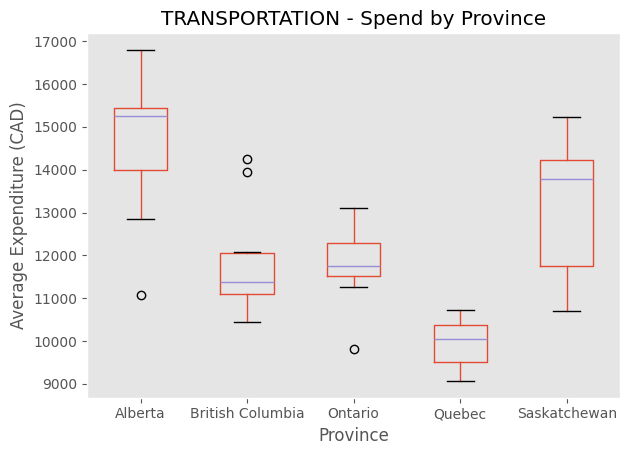

In [67]:
# Filter 'Spend: Category'
filtered_data_transpo = dataset[dataset['Data Type'] == 'Spend: Category']

# Filter rows where 'Household Spend Category' column is 'Transportation'
filtered_data_transpo = filtered_data_transpo[filtered_data_transpo['Household Spend Category'] == 'Transportation']

# Create a pivot table for the average expenditures by province and year
pivot_table_transpo = pd.pivot_table(
    filtered_data_transpo,
    values='Average expenditure per household (CAD)',
    index='Year',  
    columns='Region',  
    aggfunc='sum' 
)
# Filter specific provinces (Alberta, BC, Ontario, Quebec, Saskatchewan)
filtered_pivot_table_transpo = pivot_table_transpo[['Alberta', 'British Columbia', 'Ontario', 'Quebec', 'Saskatchewan']]

# Print the final table for Transportation
print("Table for Transportation")
print(filtered_pivot_table_transpo)

# Reset the index to convert 'Year' from index to a column
filtered_pivot_table_transpo.reset_index(inplace=True)

# Melt the DataFrame to long format for plotting
df_melted = filtered_pivot_table_transpo.melt(id_vars=['Year'], var_name='Region', value_name='Average expenditure per household (CAD)')

# Create the box plot
plt.figure(figsize=(12, 6))
df_melted.boxplot(column='Average expenditure per household (CAD)', by='Region', grid=False, showfliers=True)

# Customize the plot
plt.title('TRANSPORTATION - Spend by Province')
plt.suptitle('')  # Remove automatic "Boxplot grouped by" title
plt.xlabel('Province')
plt.ylabel('Average Expenditure (CAD)')

# Save the box plot as an image file
plt.savefig('transpo_expenditure_boxplot.png', format='png', dpi=300)

# Show the box plot
plt.tight_layout()  # Adjust layout for better fit
plt.show()

 - Alberta shows the highest median transportation spending with significant variability, indicating a broad range of transportation costs within the province. 
 - Saskatchewan also has relatively high transportation spending with a wide distribution, suggesting varying costs across households. 
 - British Columbia, Ontario, and Quebec have lower median expenditures on transportation, with Quebec showing the lowest levels and the least variability. 
 - The presence of outliers in British Columbia and Ontario indicates occasional deviations in spending, possibly due to specific high-cost cases. 
 - This plot highlights regional differences, with Alberta and Saskatchewan generally spending more on transportation compared to other provinces.

### 7.7.4 Discretionary Goods

Table for Discretionary Goods
Region  Alberta  British Columbia  Ontario   Quebec  Saskatchewan
Year                                                             
2010    11370.0            9507.0   8664.0   7204.0        9532.0
2011    12385.0           10041.0   9529.0   7635.0       10088.0
2012    12836.0            8915.0   9453.0   7319.0       10533.0
2013    13458.0            9960.0  10127.0   7977.0       10236.0
2014    12746.0           10804.0   9647.0   7858.0       11921.0
2015    13412.0           11132.0  10502.0   7643.0       12311.0
2016    12719.0           11167.0  10665.0   8230.0       11404.0
2017    12485.0           11189.0  11207.0   8855.0       12148.0
2019    16994.0           15944.0  12750.0  10802.0       15557.0
2021    13134.0           13841.0  12113.0  10621.0       14326.0


<Figure size 1200x600 with 0 Axes>

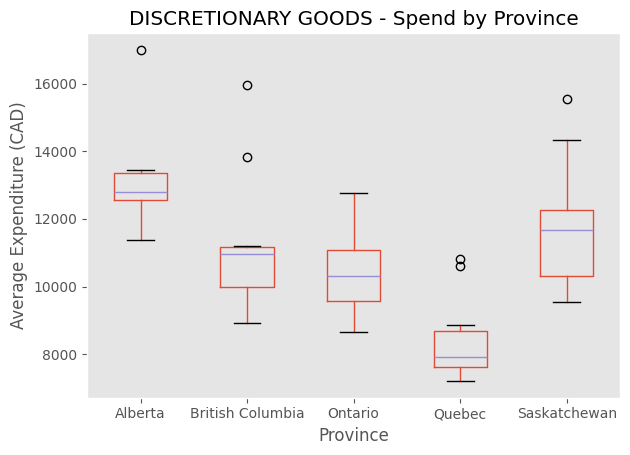

In [68]:
# Filter 'Spend: Category'
filtered_data_dg = dataset[dataset['Data Type'] == 'Spend: Category']

# Filter rows where 'Household Spend Category' column is 'Transportation'
filtered_data_dg = filtered_data_dg[filtered_data_dg['Household Spend Category'] == 'Discretionary goods']

# Create a pivot table for the average expenditures by province and year
pivot_table_dg = pd.pivot_table(
    filtered_data_dg,
    values='Average expenditure per household (CAD)',
    index='Year',  
    columns='Region',  
    aggfunc='sum' 
)
# Filter specific provinces (Alberta, BC, Ontario, Quebec, Saskatchewan)
filtered_pivot_table_dg = pivot_table_dg[['Alberta', 'British Columbia', 'Ontario', 'Quebec', 'Saskatchewan']]

# Print the final table for Transportation
print("Table for Discretionary Goods")
print(filtered_pivot_table_dg)

# Reset the index to convert 'Year' from index to a column
filtered_pivot_table_dg.reset_index(inplace=True)

# Melt the DataFrame to long format for plotting
df_melted = filtered_pivot_table_dg.melt(id_vars=['Year'], var_name='Region', value_name='Average expenditure per household (CAD)')

# Create the box plot
plt.figure(figsize=(12, 6))
df_melted.boxplot(column='Average expenditure per household (CAD)', by='Region', grid=False, showfliers=True)

# Customize the plot
plt.title('DISCRETIONARY GOODS - Spend by Province')
plt.suptitle('')  # Remove automatic "Boxplot grouped by" title
plt.xlabel('Province')
plt.ylabel('Average Expenditure (CAD)')

# Save the box plot as an image file
plt.savefig('transpo_expenditure_boxplot.png', format='png', dpi=300)

# Show the box plot
plt.tight_layout()  # Adjust layout for better fit
plt.show()

 - Alberta and Saskatchewan show higher median spending on discretionary goods, with a broad range and multiple outliers, indicating diverse spending habits within these provinces. 
 - British Columbia and Ontario have moderate spending levels with less variability, while Quebec has the lowest median expenditure and a tight distribution, suggesting more conservative spending on discretionary goods. 
 - The presence of outliers in Alberta, British Columbia, and Saskatchewan indicates instances of higher-than-average spending. 
 - This variation highlights regional differences in discretionary spending, with Alberta and Saskatchewan allocating more to non-essential goods compared to other provinces.

### 8  PREDICTIVE MODEL FITTING, EVALUATION AND SELECTION

### 8.1 Data Transformation and Pre-processing
While our goal is to provide detailed predictions that account for economic and demographic factors, as well as yearly and regional variations, we narrowed the dataset to focus on categories with complete values for all three key numeric variables, while retaining both yearly and regional data. Although Age Group and Household Type also have complete data for these variables, they offer only national-level insights. This approach ensures the dataset is clean, focused, and aligned with our objective of generating accurate, interpretable, and regionally representative predictions.

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Filter 'Spend: Income Quintile' and 'Income: Income quintile' in the 'Data Type' column
filtered_data_model_fitting = dataset[dataset['Data Type'].isin(['Spend: Income Quintile', 'Income: Income quintile'])]

# Filter out 'All quintiles' from the 'Income Quintile' column
filtered_data_model_fitting = filtered_data_model_fitting[~filtered_data_model_fitting['Income Quintile'].str.strip().isin(['All quintiles'])]

# Filter out the years 2010, 2018, 2019, 2020, 2021
filtered_data_model_fitting = filtered_data_model_fitting[~filtered_data_model_fitting['Year'].isin([2010, 2018, 2019, 2020, 2021])]

# Create a pivot table
pivot_table_model_fitting = pd.pivot_table(filtered_data_model_fitting,
    values=['Average expenditure per household (CAD)', 'Consumer Price Index', 'Disposable income per household (CAD)'],
    index=['Year', 'Region', 'Income Quintile'],
    aggfunc={'Average expenditure per household (CAD)': 'sum',
             'Disposable income per household (CAD)': 'sum',
             'Consumer Price Index': 'sum'})

# Filter specific provinces (Alberta, BC, Ontario, Quebec, Saskatchewan)
filtered_pivot_table_model_fitting = pivot_table_model_fitting.loc[
    pivot_table_model_fitting.index.get_level_values('Region').isin(['Alberta', 'British Columbia', 'Ontario', 'Quebec', 'Saskatchewan'])
]
print(f"After data transformation: {filtered_pivot_table_model_fitting.shape[0]} rows and {filtered_pivot_table_model_fitting.shape[1]} columns")

# Check the input variables in the filtered pivot table
filtered_pivot_table_model_fitting.head()


After data transformation: 175 rows and 3 columns


Average expenditure per household (CAD)  \
Year Region  Income Quintile                                             
2011 Alberta Fourth quintile                                  102306.0   
             Highest quintile                                 158893.0   
             Lowest quintile                                   34015.0   
             Second quintile                                   59249.0   
             Third quintile                                    75507.0   

                               Consumer Price Index  \
Year Region  Income Quintile                          
2011 Alberta Fourth quintile                 5942.2   
             Highest quintile                6488.5   
             Lowest quintile                 5199.9   
             Second quintile                 5860.4   
             Third quintile                  5693.0   

                               Disposable income per household (CAD)  
Year Region  Income Quintile                                          
2011 Alberta Fourth quintile                                 80788.0  
             Highest quintile                               149664.0  
             Lowest quintile                                 21996.0  
             Second quintile                                 43371.0  
             Third quintile                                  57370.0

 - Therefore, we can only have Year, Region, Income Quintile, Consumer Price Index and Disposable income per household (CAD) as our input variables
 - While our target variable is the Average expenditure per household (CAD)

### 8.1.1  One-Hot Encoding of Categorical Variables

In [71]:

# Reset the index of the pivot table to prepare for one-hot encoding
pivot_table_reset = filtered_pivot_table_model_fitting.reset_index()

# One-hot encoding categorical variables
encoded_data = pd.get_dummies(pivot_table_reset[['Year', 'Region', 'Income Quintile']], drop_first=True)

# Concatenating encoded data with numerical columns
encoded_data = pd.concat([encoded_data, pivot_table_reset[['Average expenditure per household (CAD)', 
                                                          'Consumer Price Index', 
                                                          'Disposable income per household (CAD)']]], axis=1)

# Ensuring all columns are numeric
encoded_data = encoded_data.apply(pd.to_numeric, errors='coerce')

# Dropping rows with NaN values
encoded_data = encoded_data.dropna()

# Checking columns of encoded_data
print("Columns in encoded_data after one-hot encoding:")
print(encoded_data.columns.tolist())

# Get the number of rows and columns in your dataset
num_rows, num_features = encoded_data.shape

print(f"Number of rows: {num_rows}")
print(f"Number of features (columns): {num_features}")

Columns in encoded_data after one-hot encoding:
['Year', 'Region_British Columbia', 'Region_Ontario', 'Region_Quebec', 'Region_Saskatchewan', 'Income Quintile_Highest quintile', 'Income Quintile_Lowest quintile', 'Income Quintile_Second quintile', 'Income Quintile_Third quintile', 'Average expenditure per household (CAD)', 'Consumer Price Index', 'Disposable income per household (CAD)']
Number of rows: 175
Number of features (columns): 12


### 8.1.2  Outlier Detection and Handling

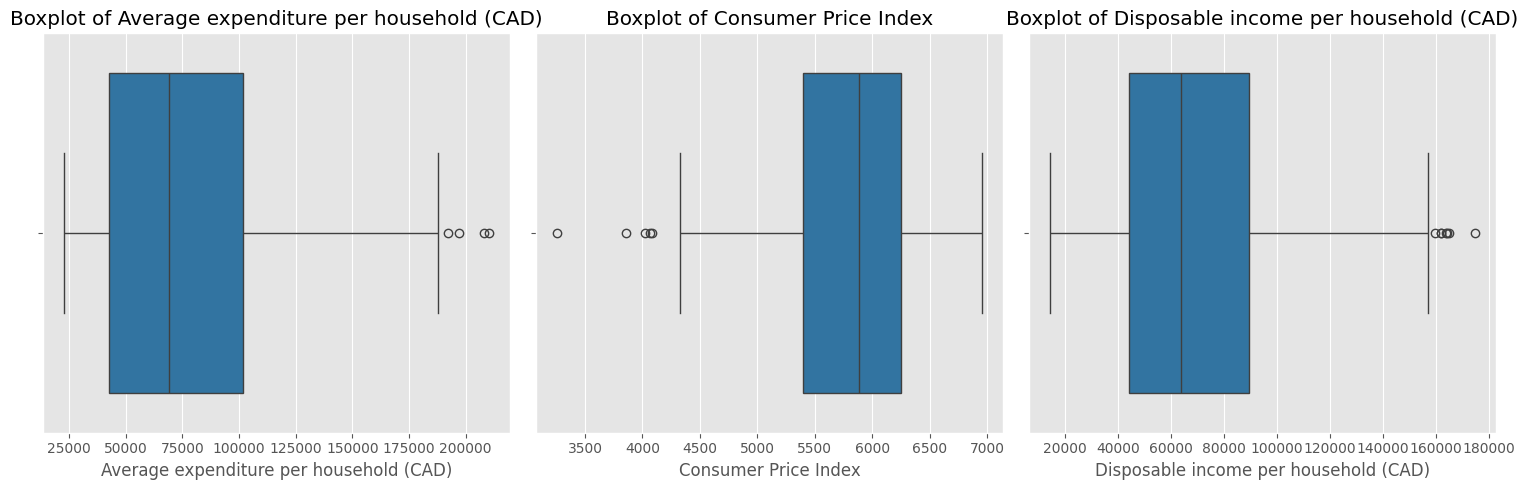

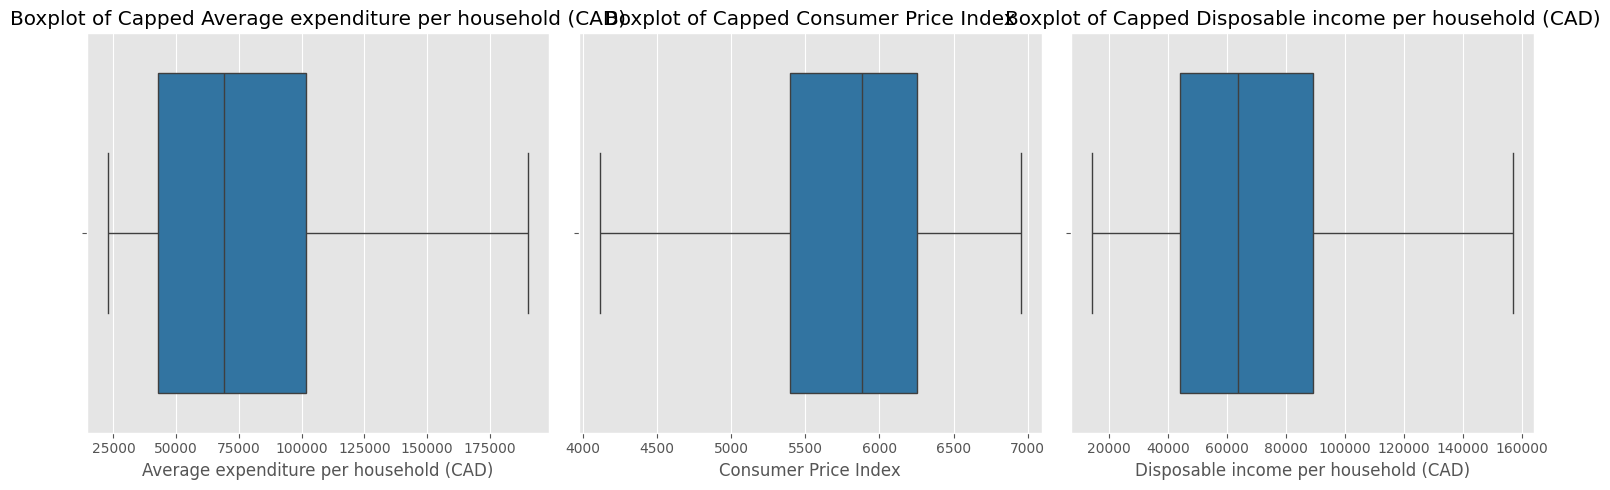

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the numeric columns to check for outliers
numeric_columns = ['Average expenditure per household (CAD)', 'Consumer Price Index', 'Disposable income per household (CAD)']

# Visualize initial distributions with box plots
plt.figure(figsize=(15, 5))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=encoded_data, x=column, color='#1f77b4')
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

# Detect outliers using IQR and cap them
encoded_data_capped = encoded_data.copy()  # Make a copy to apply capping
for column in numeric_columns:
    Q1 = encoded_data[column].quantile(0.25)
    Q3 = encoded_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap the values outside the lower and upper bounds
    encoded_data_capped[column] = np.where(
        encoded_data[column] < lower_bound, lower_bound,
        np.where(encoded_data[column] > upper_bound, upper_bound, encoded_data[column])
    )

# Visualize capped data with box plots to confirm outlier handling
plt.figure(figsize=(15, 5))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=encoded_data_capped, x=column, color='#1f77b4')
    plt.title(f'Boxplot of Capped {column}')
plt.tight_layout()
plt.show()

### 8.1.3  Multicollinearity Analysis: Variance Inflation Factor (VIF) and Correlation Matrix Heatmap

Numeric columns for VIF calculation (excluding target):
['Year', 'Consumer Price Index', 'Disposable income per household (CAD)']
                                 feature         VIF
0                                   Year  117.998449
1                   Consumer Price Index  154.657179
2  Disposable income per household (CAD)    7.704662


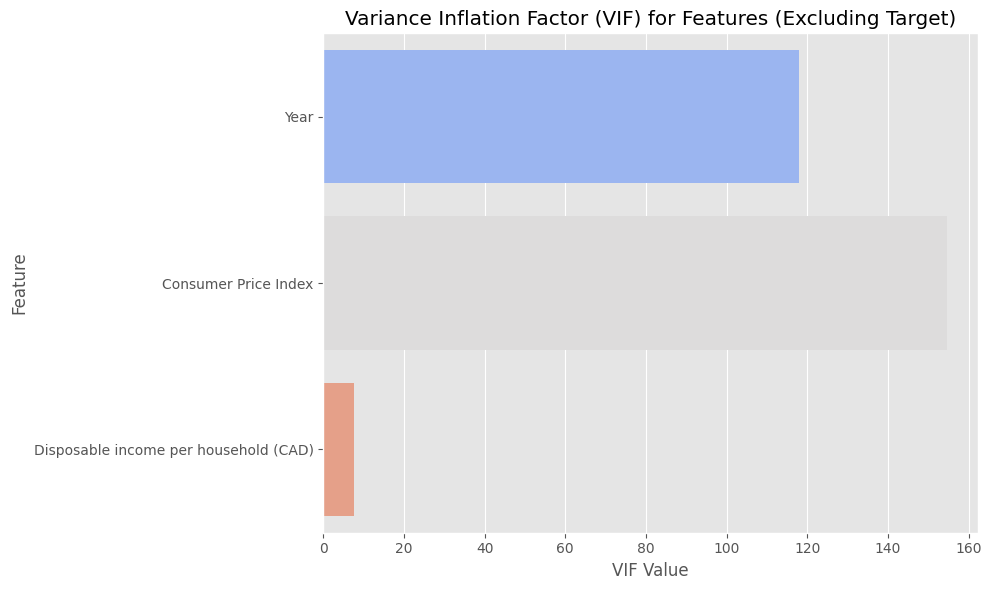

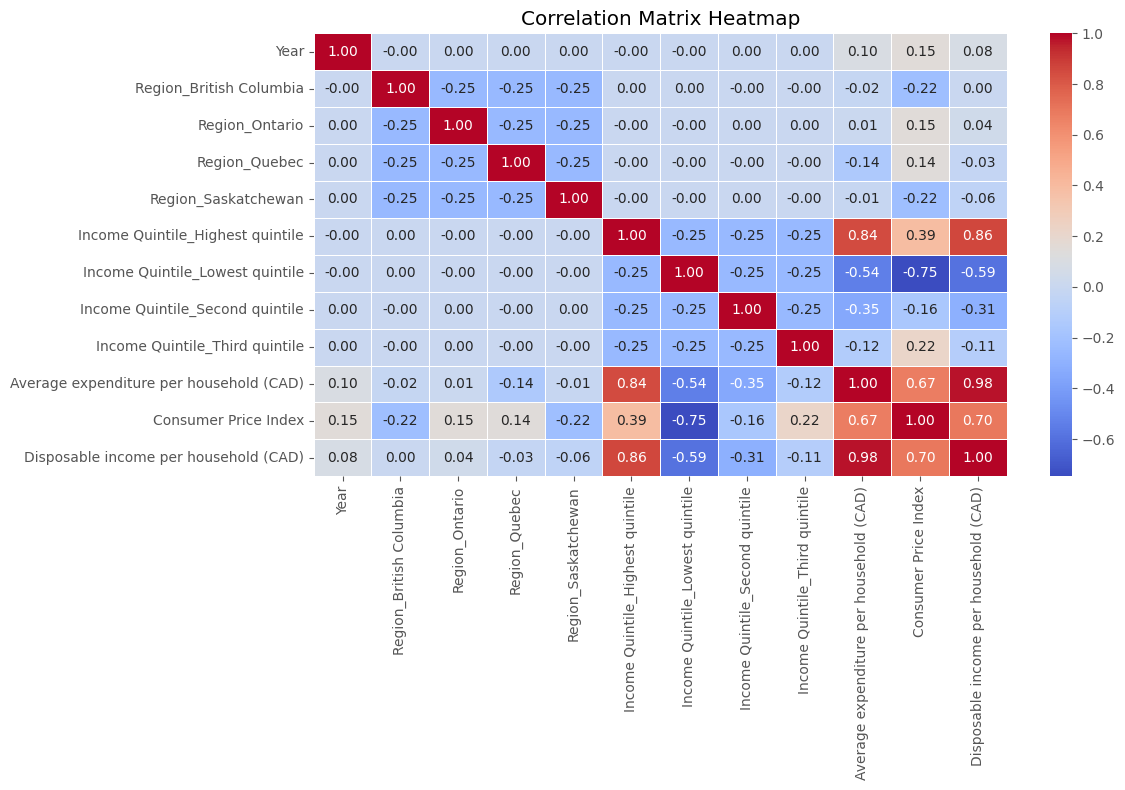

In [31]:
# Variance Inflation Factor (VIF) Calculation

from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Select only numeric columns for VIF calculation
numeric_columns = encoded_data_capped.select_dtypes(include=[np.number])

# Exclude the target variable
numeric_columns = numeric_columns.drop(columns=['Average expenditure per household (CAD)'])
print("Numeric columns for VIF calculation (excluding target):")
print(numeric_columns.columns.tolist())

# Calculate the Variance Inflation Factor (VIF) for each variable
vif_data = pd.DataFrame()
vif_data["feature"] = numeric_columns.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_columns.values, i) for i in range(numeric_columns.shape[1])]

# Print VIF data
print(vif_data)

# Visualize the VIF values
plt.figure(figsize=(10, 6))
sns.barplot(x="VIF", y="feature", data=vif_data, hue="feature", dodge=False, palette="coolwarm", legend=False)
plt.title('Variance Inflation Factor (VIF) for Features (Excluding Target)')
plt.xlabel('VIF Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Correlation Matrix Heatmap (including target variable but not part of VIF)
corr_matrix = encoded_data_capped.corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

 - Year (VIF = 117.99) and Consumer Price Index (VIF = 154.66) have very high VIFs signaling severe multicollinearity which can lead to issues in our regression models by making coefficient estimates unstable and unreliable.
 - If we look into the correlation heatmap, the strong positive and negative correlations between Income Quintiles and Disposable income per household (CAD)  indicates potential redundancy. Both variables likely capture similar aspects of household wealth or economic capacity.
 - We will try to address this multicollinearity in the below section.

### 8.1.4 Addressing Multicolliearity and Dimensionality Reduction

Numeric columns for VIF calculation:
['Average expenditure per household (CAD)', 'Disposable income per household (CAD)', 'CPI_Trend']
Numeric columns for VIF calculation (excluding target):
['Disposable income per household (CAD)', 'CPI_Trend']
                                 feature       VIF
0  Disposable income per household (CAD)  5.156798
1                              CPI_Trend  5.156798


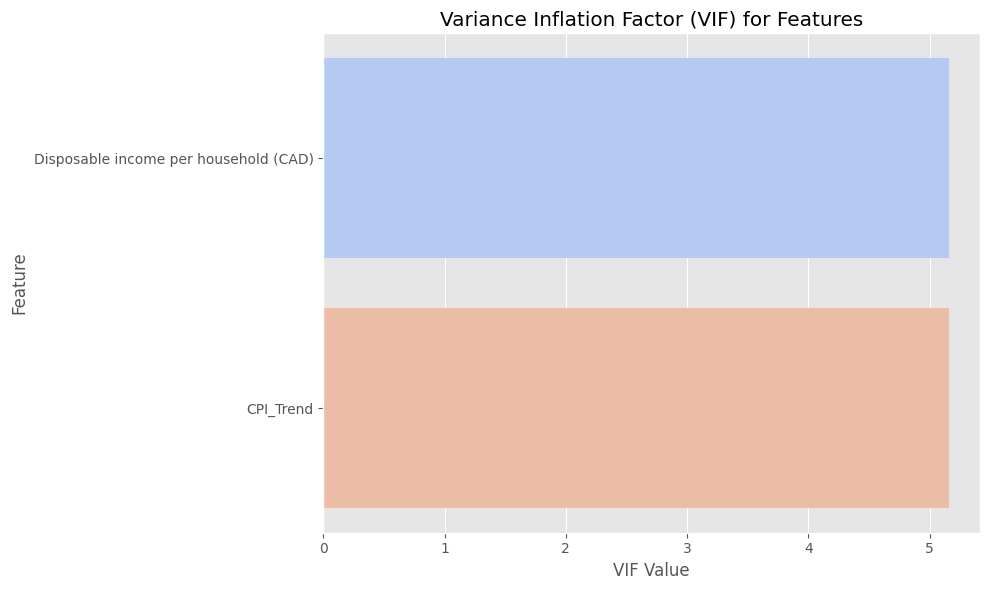

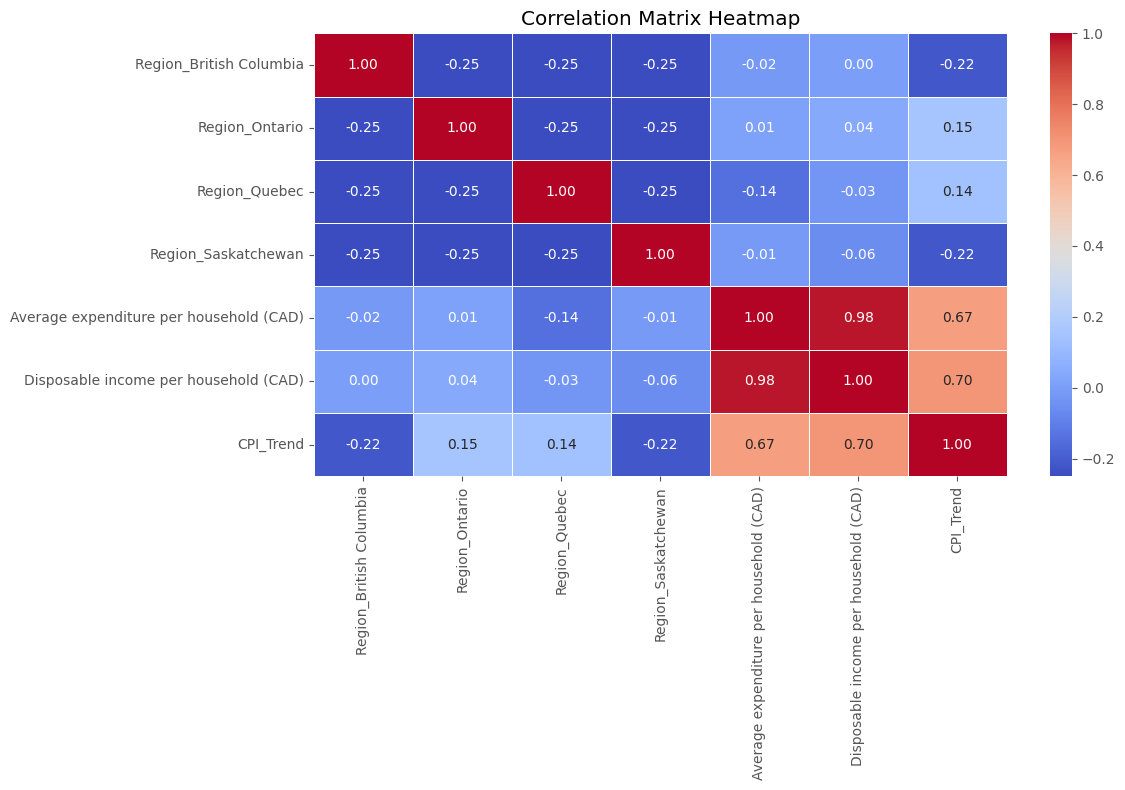

In [32]:
# Defining dataframe
encoded_data_dr = encoded_data_capped

# Create a new variable combining CPI with Year to reduce collinearity
encoded_data_dr['CPI_Trend'] = encoded_data_dr['Consumer Price Index'] * encoded_data_dr['Year']

# Drop the original 'Consumer Price Index' and 'Year' columns if CPI_Trend captures their impact
encoded_data_dr = encoded_data_dr.drop(columns=['Consumer Price Index', 'Year'], errors='ignore')

# Drop the Income Quintile columns to reduce redundancy
columns_to_drop = [
    'Income Quintile_Highest quintile',
    'Income Quintile_Lowest quintile',
    'Income Quintile_Second quintile',
    'Income Quintile_Third quintile'
]

encoded_data_dr = encoded_data_dr.drop(columns=columns_to_drop, errors='ignore')

# Checking the Effect of the Changes Made
# Variance Inflation Factor (VIF) Calculation

from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Select only numeric columns for VIF calculation
numeric_columns = encoded_data_dr.select_dtypes(include=[np.number])
print("Numeric columns for VIF calculation:")
print(numeric_columns.columns.tolist())

# Exclude the target variable
numeric_columns = numeric_columns.drop(columns=['Average expenditure per household (CAD)'])
print("Numeric columns for VIF calculation (excluding target):")
print(numeric_columns.columns.tolist())

# Calculate the Variance Inflation Factor (VIF) for each variable
vif_data = pd.DataFrame()
vif_data["feature"] = numeric_columns.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_columns.values, i) for i in range(numeric_columns.shape[1])]

# Print VIF data
print(vif_data)

# Visualize the VIF values
plt.figure(figsize=(10, 6))
sns.barplot(x="VIF", y="feature", data=vif_data, hue="feature", dodge=False, palette="coolwarm", legend=False)
plt.title('Variance Inflation Factor (VIF) for Features')
plt.xlabel('VIF Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Correlation Matrix Heatmap
corr_matrix = encoded_data_dr.corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

 - After addressing multicollinearity, the Variance Inflation Factors (VIF) for all features are low (1.006), indicating minimal redundancy. 
 - Dropping of Income Quintile features may reduce redundancy with Disposable Income per Household (CAD) while preserving the numerical precision of disposable income.

In [33]:
# Check the input variables after addressing Multicolliearity and Dimensionality Reduction
print(encoded_data_dr.columns.tolist())

['Region_British Columbia', 'Region_Ontario', 'Region_Quebec', 'Region_Saskatchewan', 'Average expenditure per household (CAD)', 'Disposable income per household (CAD)', 'CPI_Trend']


- Our resulting input variables are now Region_British Columbia, Region_Ontario, Region_Quebec, Region_Saskatchewan, Average expenditure per household (CAD), Disposable income per household (CAD) and CPI_Trend.
 - While our target variable is the Average expenditure per household (CAD)

### 8.2 Predictive Models Fitting and Evaluation

### 8.2.1 Linear Regression Model

Linear Regression Mean Squared Error: 52438469.24
Linear Regression Root Mean Squared Error: 7241.44
Linear Regression R² Score: 0.98
Linear Regression Mean Absolute Error: 5586.78
Linear Regression Mean Percentage Error: 9.46%


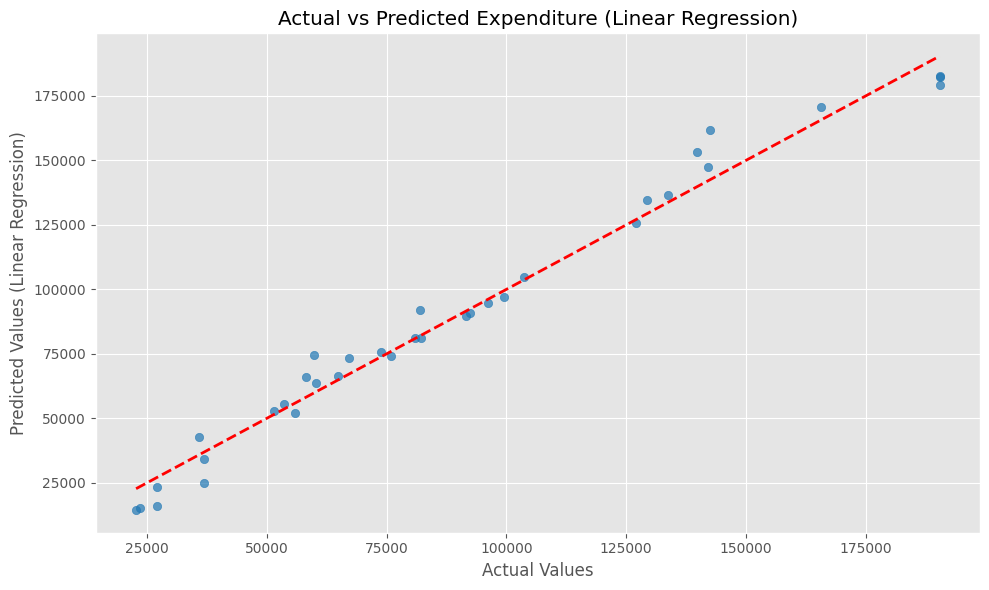

                                 Feature    Importance
4  Disposable income per household (CAD)  44979.499517
2                          Region_Quebec   9144.779289
1                         Region_Ontario   5923.872799
0                Region_British Columbia   4569.414316
3                    Region_Saskatchewan   3096.302119
5                              CPI_Trend    271.480263


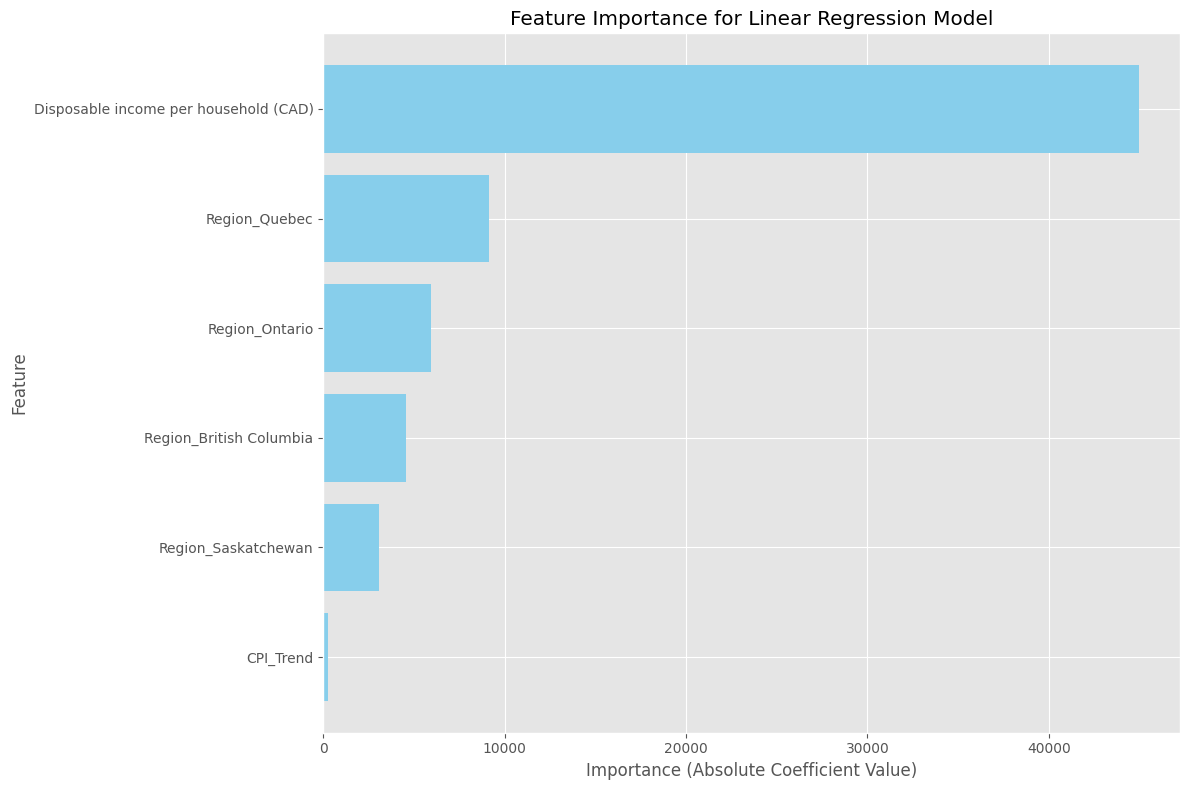

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Define features and target variable
X = encoded_data_dr.drop(columns=['Average expenditure per household (CAD)'])
y = encoded_data_dr['Average expenditure per household (CAD)']

# Step 1: Scaling the feature sets
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 3: Linear Regression Model without interaction terms
linear_model = LinearRegression()

# Fit the model on the training data
linear_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_lr = linear_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lr)

# Print the evaluation metrics
print(f"Linear Regression Mean Squared Error: {mse:.2f}")
print(f"Linear Regression Root Mean Squared Error: {rmse:.2f}")
print(f"Linear Regression R² Score: {r2:.2f}")

# Calculate error rates
absolute_error = np.abs(y_test - y_pred_lr)
percentage_error = (absolute_error / y_test) * 100

# Print the mean absolute and percentage errors
mean_absolute_error = np.mean(absolute_error)
mean_percentage_error = np.mean(percentage_error)

print(f"Linear Regression Mean Absolute Error: {mean_absolute_error:.2f}")
print(f"Linear Regression Mean Percentage Error: {mean_percentage_error:.2f}%")

# Visualize the predicted vs actual values for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, color='#1f77b4', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # 45-degree line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values (Linear Regression)')
plt.title('Actual vs Predicted Expenditure (Linear Regression)')
plt.tight_layout()
plt.show()

# Feature Importance Visualization
coefficients = linear_model.coef_
features = X.columns

# Create a DataFrame for the feature importances
importance_df = pd.DataFrame({'Feature': features, 'Importance': np.abs(coefficients)})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance (Absolute Coefficient Value)')
plt.ylabel('Feature')
plt.title('Feature Importance for Linear Regression Model')
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.tight_layout()
plt.show()


### 8.2.2 Random Forest Regressor

Random Forest Mean Squared Error: 73428000.69
Random Forest Root Mean Squared Error: 8569.01
Random Forest R² Score: 0.97
Random Forest Mean Absolute Error: 6742.66
Random Forest Mean Percentage Error: 7.77%


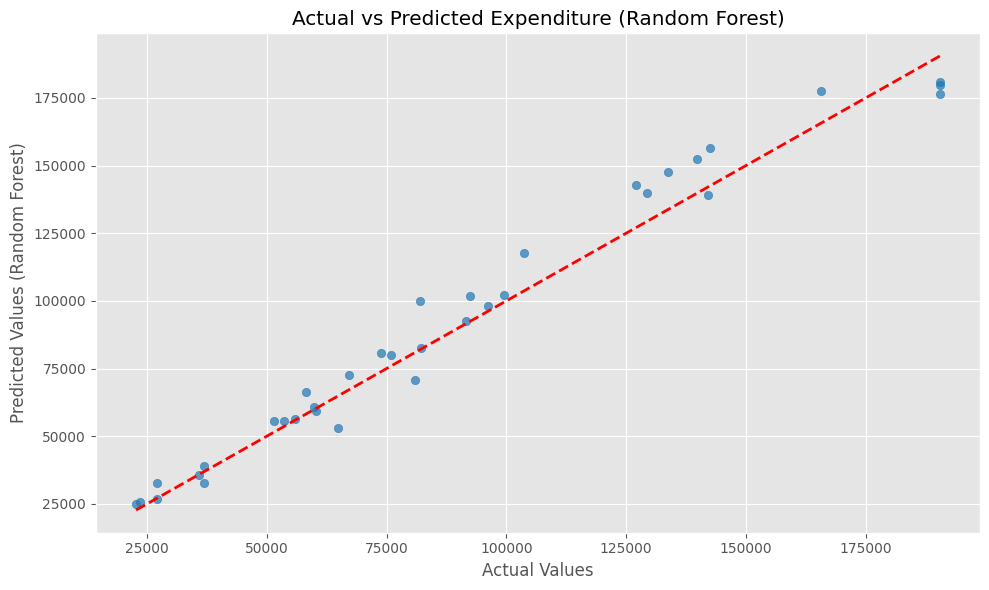

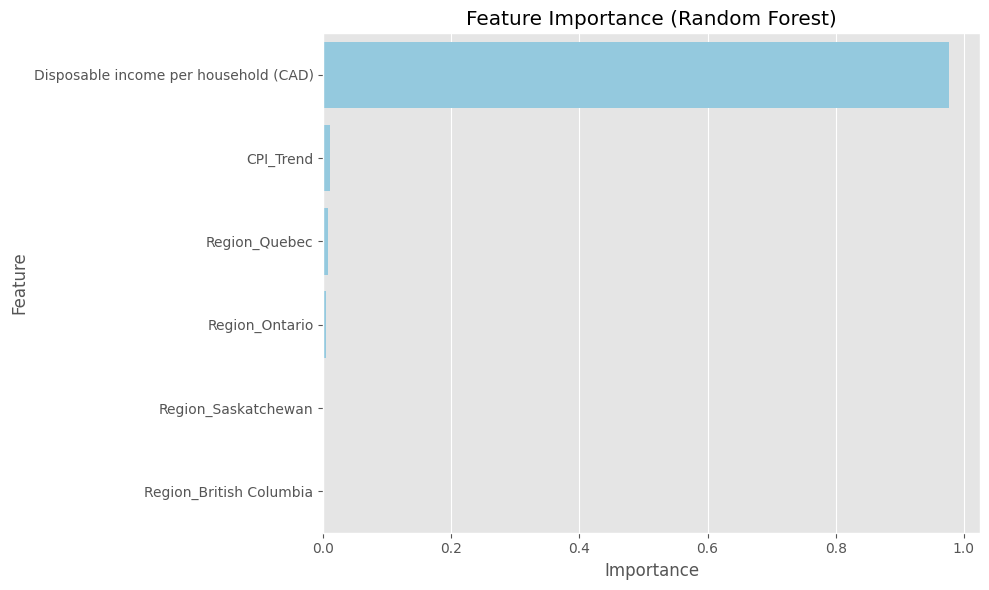

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

# Define features and target variable
X = encoded_data_dr.drop(columns=['Average expenditure per household (CAD)'])
y = encoded_data_dr['Average expenditure per household (CAD)']

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor (without hyperparameter tuning)
rf_model = RandomForestRegressor(random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model's performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the evaluation metrics for Random Forest
print(f"Random Forest Mean Squared Error: {mse_rf:.2f}")
print(f"Random Forest Root Mean Squared Error: {rmse_rf:.2f}")
print(f"Random Forest R² Score: {r2_rf:.2f}")

# Calculate error rates
absolute_error = np.abs(y_test - y_pred_rf)
percentage_error = (absolute_error / y_test) * 100

# Print the mean absolute and percentage errors
mean_absolute_error = np.mean(absolute_error)
mean_percentage_error = np.mean(percentage_error)

print(f"Random Forest Mean Absolute Error: {mean_absolute_error:.2f}")
print(f"Random Forest Mean Percentage Error: {mean_percentage_error:.2f}%")

# Visualize the predicted vs actual values for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='#1f77b4', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # 45-degree line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values (Random Forest)')
plt.title('Actual vs Predicted Expenditure (Random Forest)')
plt.tight_layout()
plt.show()

# Feature Importance Bar Chart
feature_importances = rf_model.feature_importances_

# Create a DataFrame for the feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, color='skyblue')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


### 8.2.3 XGBoost Regressor

XGBoost Mean Squared Error: 53939627.65
XGBoost Root Mean Squared Error: 7344.36
XGBoost R² Score: 0.98
XGBoost Mean Absolute Error: 5792.08
XGBoost Mean Percentage Error: 7.36%


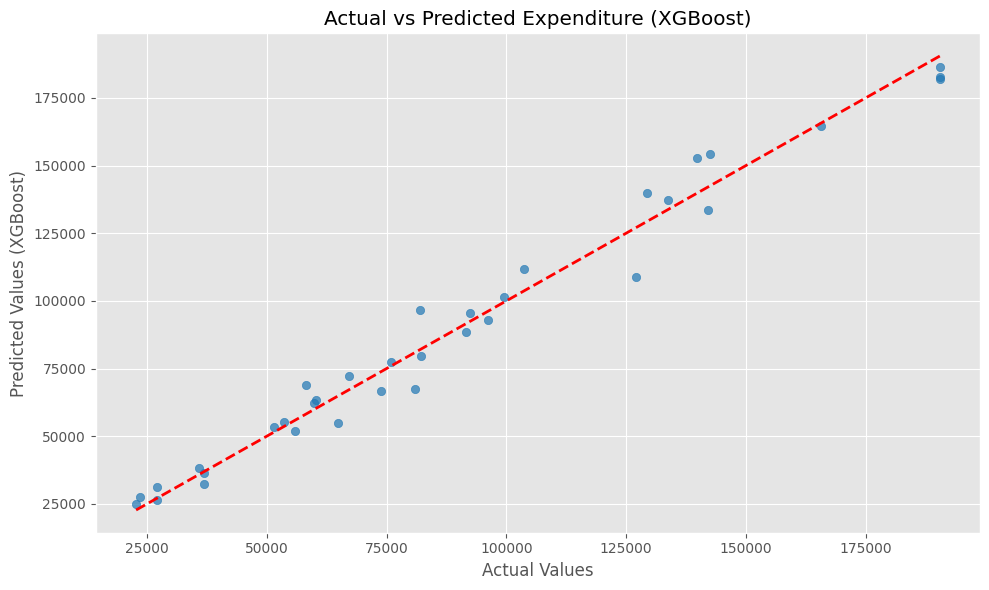

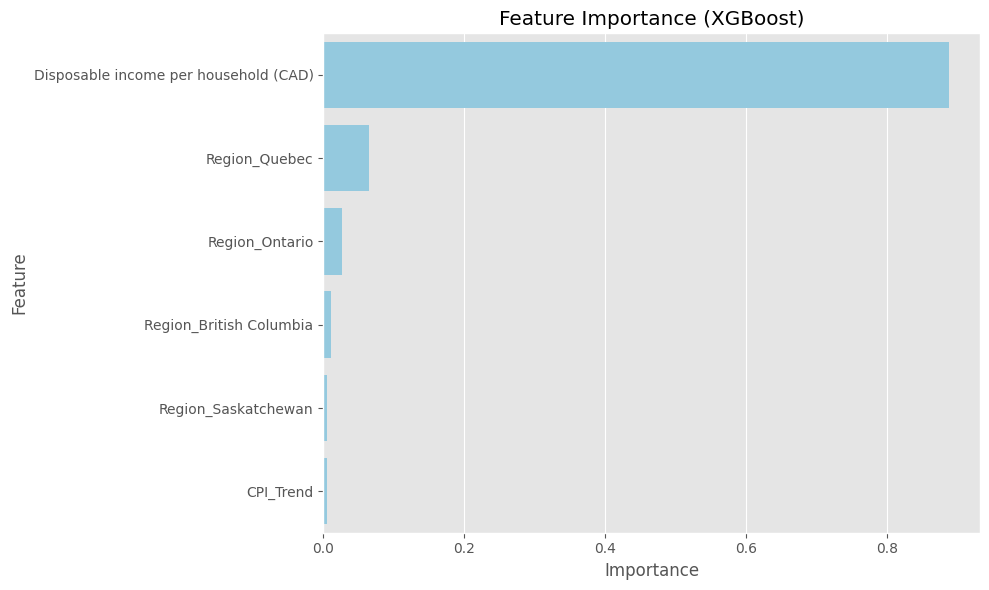

In [33]:
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = encoded_data_dr.drop(columns=['Average expenditure per household (CAD)'])
y = encoded_data_dr['Average expenditure per household (CAD)']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create an XGBoost model
xgboost_model = XGBRegressor(random_state=42)

# Fit the model
xgboost_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_xgb = xgboost_model.predict(X_test)

# Evaluate the model's performance
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print the evaluation metrics for XGBoost
print(f"XGBoost Mean Squared Error: {mse_xgb:.2f}")
print(f"XGBoost Root Mean Squared Error: {rmse_xgb:.2f}")
print(f"XGBoost R² Score: {r2_xgb:.2f}")

# Calculate error rates
absolute_error_xgb = np.abs(y_test - y_pred_xgb)
percentage_error_xgb = (absolute_error_xgb / y_test) * 100

# Print the mean absolute and percentage errors
mean_absolute_error_xgb = np.mean(absolute_error_xgb)
mean_percentage_error_xgb = np.mean(percentage_error_xgb)

print(f"XGBoost Mean Absolute Error: {mean_absolute_error_xgb:.2f}")
print(f"XGBoost Mean Percentage Error: {mean_percentage_error_xgb:.2f}%")

# Visualize the predicted vs actual values for XGBoost
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, color='#1f77b4', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # 45-degree line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values (XGBoost)')
plt.title('Actual vs Predicted Expenditure (XGBoost)')
plt.tight_layout()
plt.show()

# 4. Feature Importance
feature_importances = xgboost_model.feature_importances_

# Create a DataFrame to visualize feature importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, color='skyblue')
plt.title('Feature Importance (XGBoost)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


### 8.2.4 Neural Network Regressor

Neural Network Mean Squared Error: 79554333.64
Neural Network Root Mean Squared Error: 8919.32
Neural Network R² Score: 0.97
Neural Network Mean Absolute Error: 7623.12
Neural Network Mean Percentage Error: 11.57%


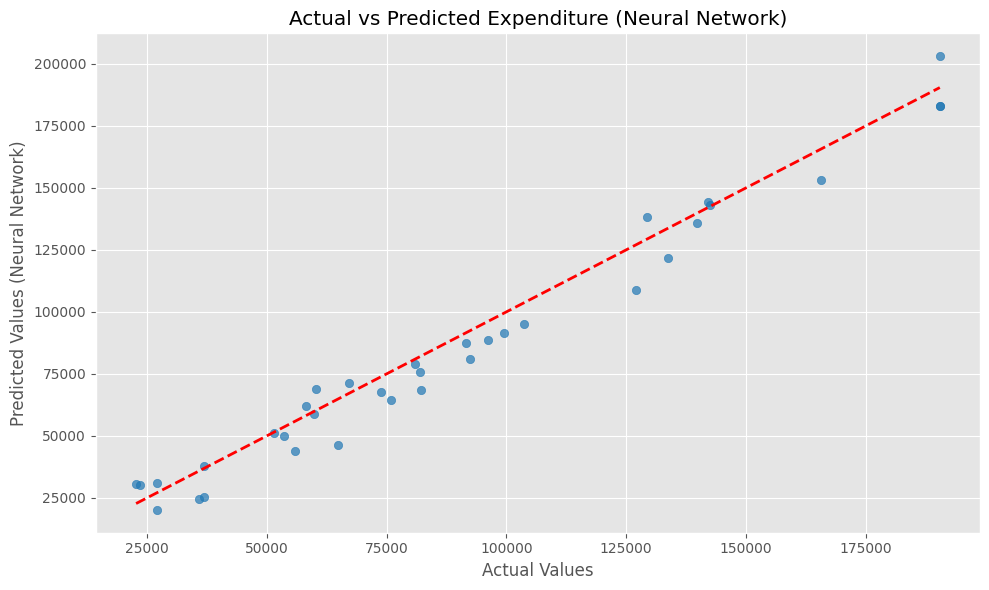

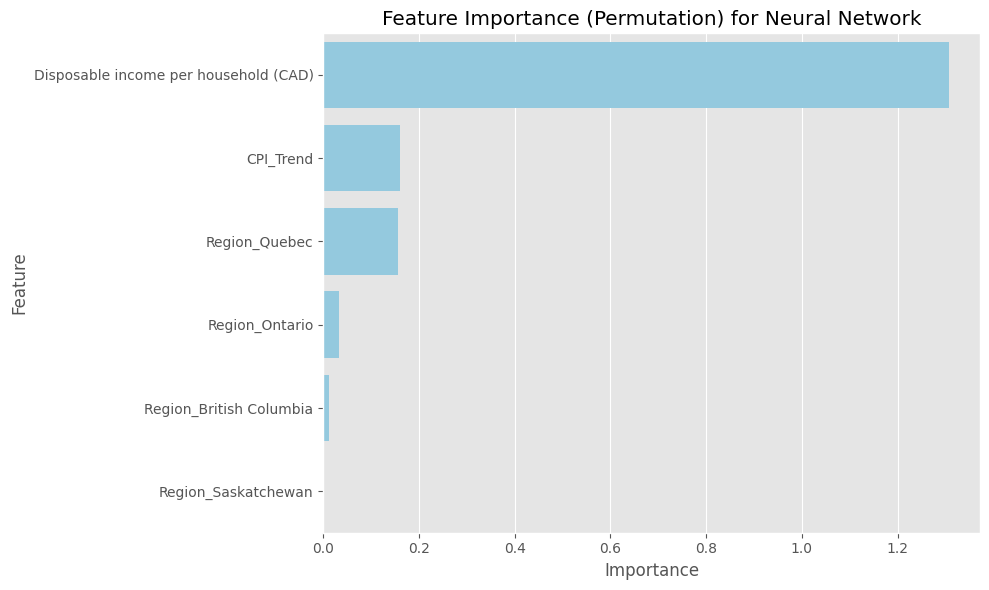

In [43]:
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import warnings
import pandas as pd
import seaborn as sns
from sklearn.inspection import permutation_importance

# Suppress ConvergenceWarnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Define features and target variable
X = encoded_data_dr.drop(columns=['Average expenditure per household (CAD)'])
y = encoded_data_dr['Average expenditure per household (CAD)']

# Step: Scaling the feature sets before splitting
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a simpler Neural Network model
neural_network_model = MLPRegressor(
    solver='adam',                     # 'adam' optimizer is often more efficient
    hidden_layer_sizes=(128, 64, 32),   # Retaining 3 layers but fine-tuned
    max_iter=1000,                      # Increased iterations to allow more training time
    learning_rate_init=0.001,           # Increased learning rate for faster convergence
    alpha=0.001,                       # Regularization parameter
    batch_size='auto',                  # 'auto' dynamically selects the batch size
    tol=1e-6,                           # Tolerance for optimization (lower tolerance for finer adjustments)
    early_stopping=True,                # Early stopping to prevent overfitting
    validation_fraction=0.2,            # Fraction of training data used for early stopping validation
    n_iter_no_change=10,                # Increased iterations for early stopping
    random_state=42                     # Ensures reproducibility
)


# Fit the model on the scaled training data
neural_network_model.fit(X_train, y_train)

# Make predictions on the scaled testing set
y_pred_nn = neural_network_model.predict(X_test)

# Evaluate the model's performance
mse_nn = mean_squared_error(y_test, y_pred_nn)
rmse_nn = np.sqrt(mse_nn)
r2_nn = r2_score(y_test, y_pred_nn)

# Print the evaluation metrics for the Neural Network
print(f"Neural Network Mean Squared Error: {mse_nn:.2f}")
print(f"Neural Network Root Mean Squared Error: {rmse_nn:.2f}")
print(f"Neural Network R² Score: {r2_nn:.2f}")

# Calculate error rates
absolute_error_nn = np.abs(y_test - y_pred_nn)
percentage_error_nn = (absolute_error_nn / y_test) * 100

# Print the mean absolute and percentage errors
mean_absolute_error_nn = np.mean(absolute_error_nn)
mean_percentage_error_nn = np.mean(percentage_error_nn)

print(f"Neural Network Mean Absolute Error: {mean_absolute_error_nn:.2f}")
print(f"Neural Network Mean Percentage Error: {mean_percentage_error_nn:.2f}%")

# Visualize the predicted vs actual values for Neural Network
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_nn, color='#1f77b4', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # 45-degree line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values (Neural Network)')
plt.title('Actual vs Predicted Expenditure (Neural Network)')
plt.tight_layout()
plt.show()

# Permutation Importance
results = permutation_importance(neural_network_model, X_test, y_test, n_repeats=10, random_state=42)

# Extract the mean importance scores for each feature
importance = results.importances_mean

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, color='skyblue')
plt.title('Feature Importance (Permutation) for Neural Network')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


### 8.3 Evaluating Individual Model Performance Metrics and Selecting the Best Model

We fitted 4 predictive models to our dataset (Linear Regression, Random Forest Regressor, XGBoost Regressor and Neural Network Regressor) and below is a comparison of their performance metrics.

<div style="display: flex; justify-content: space-around; align-items: center;">
    <img src="https://i.imgur.com/0uRJGHV.png" alt="Model Comparisson" width="1200" height="500" style="margin: 0 50px;"/>
</div>

 - Linear Regression is the best overall model, with the lowest Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE), along with a high R² score of 0.98. 
 - XGBoost also performs well, particularly excelling in minimizing Mean Percentage Error (MPE) at 7.36%. 
 - Both Linear Regression and XGBoost have the highest R² score, but Linear Regression stands out in terms of accuracy and lower error. 
 - If minimizing percentage error is a priority, XGBoost is the better choice, while Linear Regression is best for overall accuracy and lower error magnitude.

### 8.4 Cross validation across Four Models

In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import RobustScaler
import numpy as np
import pandas as pd

# Define the features and target variable
X = encoded_data_dr.drop(columns=['Average expenditure per household (CAD)'])
y = encoded_data_dr['Average expenditure per household (CAD)']

# Standardize the features
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the models
neural_network_model = MLPRegressor(
    solver='adam',                     # 'adam' optimizer is often more efficient
    hidden_layer_sizes=(128, 64, 32),   # Retaining 3 layers but fine-tuned
    max_iter=2000,                      # Increased iterations to allow more training time
    learning_rate_init=0.001,           # Increased learning rate for faster convergence
    alpha=0.001,                       # Regularization parameter
    batch_size='auto',                  # 'auto' dynamically selects the batch size
    tol=1e-6,                           # Tolerance for optimization (lower tolerance for finer adjustments)
    early_stopping=True,                # Early stopping to prevent overfitting
    validation_fraction=0.2,            # Fraction of training data used for early stopping validation
    n_iter_no_change=10,                # Increased iterations for early stopping
    random_state=42                     # Ensures reproducibility
)

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'Neural Network': neural_network_model 
}

# Create an empty dictionary to store cross-validation results
results = {'Model': [], 'MSE Mean': [], 'MSE Std Dev': [], 'R² Mean': [], 'R² Std Dev': []}

# Perform cross-validation for each model
for model_name, model in models.items():
    # MSE cross-validation
    mse_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
    
    # R² cross-validation
    r2_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='r2')
    
    # Store the results
    results['Model'].append(model_name)
    results['MSE Mean'].append(np.mean(-mse_scores))  # Convert negative MSE back to positive
    results['MSE Std Dev'].append(np.std(-mse_scores))  # Convert negative MSE back to positive
    results['R² Mean'].append(np.mean(r2_scores))
    results['R² Std Dev'].append(np.std(r2_scores))

# Convert the results dictionary into a DataFrame for easier viewing
cv_results = pd.DataFrame(results)

# Display the results
print(cv_results)


               Model      MSE Mean   MSE Std Dev   R² Mean  R² Std Dev
0  Linear Regression  4.613124e+07  1.069136e+07  0.978029    0.004842
1      Random Forest  7.013928e+07  2.736837e+07  0.966207    0.014282
2            XGBoost  6.319175e+07  2.674281e+07  0.969902    0.012534
3     Neural Network  8.111408e+07  2.918661e+07  0.960473    0.017350


### 8.5 Cross-Validation Performance Comparison and Best Model Selection
We have done cross-validation among the four models to further compare their performance and robustness. This ensures reliable evaluation by assessing the models' predictive accuracy (using MSE and R² metrics) across multiple data splits, helping identify the most robust and accurate model for predicting household expenditure.
<div style="display: flex; justify-content: space-around; align-items: center;">
    <img src="https://i.imgur.com/EsKuq1z.png" alt="Model Cross Validation" width="1000" height="500" style="margin: 0 70px;"/>
</div>

 - After cross-validation, Linear Regression remains the best model across all metrics. It has the lowest Mean Squared Error (MSE) mean and the lowest standard deviation, indicating both accuracy and consistency. Additionally, Linear Regression has the highest R² mean and the lowest R² standard deviation, showing it provides the most stable performance and explains the most variance in the data. 
 - Overall, Linear Regression outperforms other models in both accuracy and stability.

### 8.6 Optimizing Linear Regression Performance with Ridge and Lasso Regularization Techniques 

Linear Regression Mean Squared Error: 52438469.24
Linear Regression Root Mean Squared Error: 7241.44
Linear Regression R² Score: 0.98
Linear Regression Mean Absolute Error (MAE): 5586.78
Linear Regression Percentage Error (average): 9.46%
Ridge Regression Mean Squared Error: 52510657.81
Ridge Regression Root Mean Squared Error: 7246.42
Ridge Regression R² Score: 0.98
Ridge Regression Mean Absolute Error (MAE): 5621.82
Ridge Regression Percentage Error (average): 9.52%
Lasso Regression Mean Squared Error: 52438486.97
Lasso Regression Root Mean Squared Error: 7241.44
Lasso Regression R² Score: 0.98
Lasso Regression Mean Absolute Error (MAE): 5586.78
Lasso Regression Percentage Error (average): 9.46%
Best model based on R² Score: Linear Regression


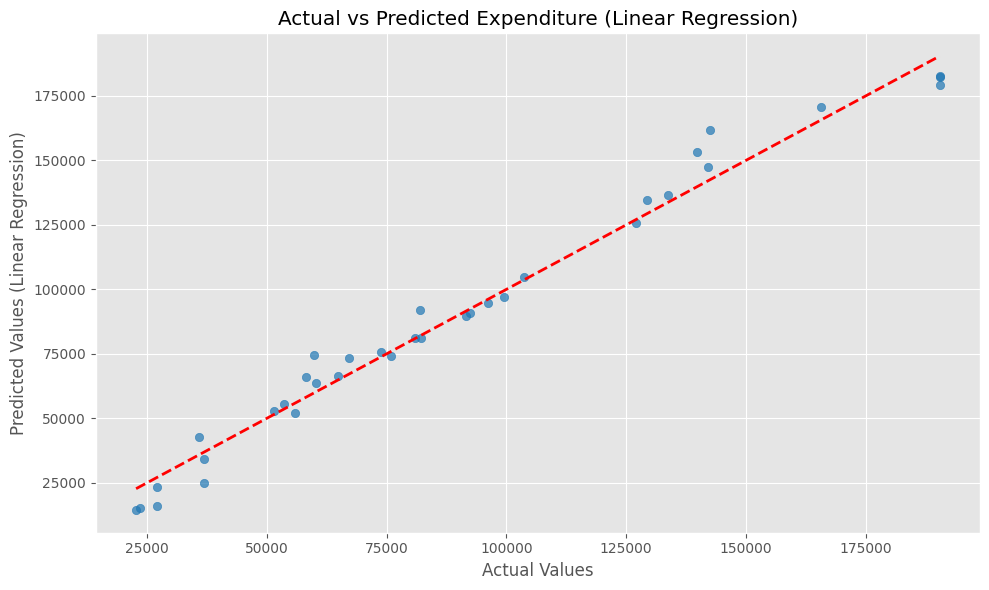

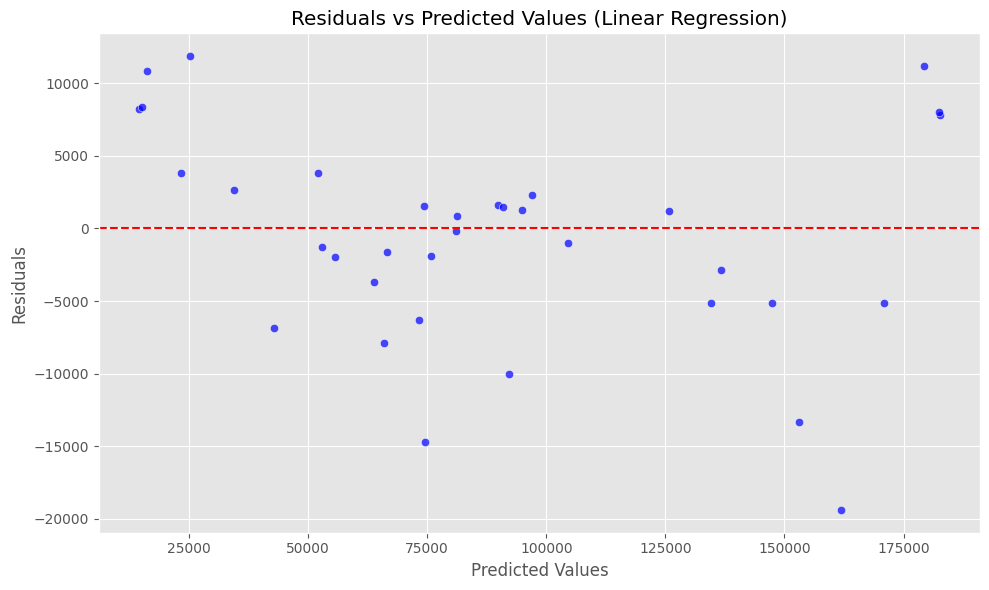

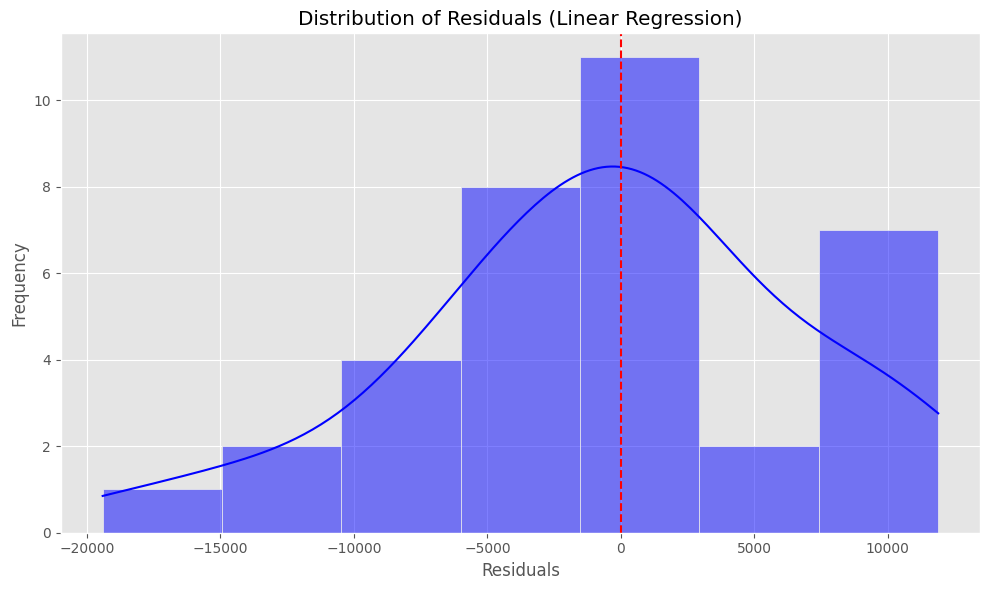

Linear Regression Cross-Validation RMSE (5-fold): 6792.00


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Define features and target variable
X = encoded_data_dr.drop(columns=['Average expenditure per household (CAD)'])
y = encoded_data_dr['Average expenditure per household (CAD)']

# Step: Scaling the feature sets before splitting into training and testing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a linear regression model with Ridge and Lasso for regularization
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),  # Add alpha for regularization strength
    'Lasso Regression': Lasso(alpha=0.01)  # Add alpha for regularization strength
}

best_model = None
best_r2 = -np.inf

# Iterate through models and evaluate using cross-validation
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{model_name} Mean Squared Error: {mse:.2f}")
    print(f"{model_name} Root Mean Squared Error: {rmse:.2f}")
    print(f"{model_name} R² Score: {r2:.2f}")
    
    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{model_name} Mean Absolute Error (MAE): {mae:.2f}")
    
    # Calculate the percentage error
    percentage_error = (abs(y_pred - y_test.values) / y_test.values) * 100
    print(f"{model_name} Percentage Error (average): {percentage_error.mean():.2f}%")
    
    # Keep track of the best model
    if r2 > best_r2:
        best_r2 = r2
        best_model = model_name

# Print the best model based on R² Score
print(f"Best model based on R² Score: {best_model}")

# Visualizing the best model's predictions vs actual values
best_model_instance = models[best_model]
y_pred_best = best_model_instance.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, color='#1f77b4', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # 45-degree line
plt.xlabel('Actual Values')
plt.ylabel(f'Predicted Values ({best_model})')
plt.title(f'Actual vs Predicted Expenditure ({best_model})')
plt.tight_layout()
plt.show()

# Visualizing the residuals for the best model
residuals = y_test - y_pred_best

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_best, y=residuals, color='blue', alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title(f'Residuals vs Predicted Values ({best_model})')
plt.tight_layout()
plt.show()

# Distribution of residuals (Error Distribution)
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue')
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title(f'Distribution of Residuals ({best_model})')
plt.tight_layout()
plt.show()

# Cross-validation to assess model performance (for Linear Regression)
cv_scores = cross_val_score(models['Linear Regression'], X_scaled, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(np.mean(np.abs(cv_scores)))  # Convert MSE to RMSE
print(f"Linear Regression Cross-Validation RMSE (5-fold): {cv_rmse:.2f}")


 - We evaluated three regularized linear regression models (Linear Regression, Ridge, and Lasso) using cross-validation, scaling the data, and comparing key performance metrics (e.g., R², RMSE). This process helped reduce overfitting and improved the model's reliability for making accurate real-world predictions.

### 8.7 Trial Prediction and Accuracy Evaluation

Since our Linear Regression model was trained using data from 2010 to 2017, we will now use it to forecast the Average Household Expenditure in Ontario for 2021, based on a Consumer Price Index (CPI) of 141.6 and a Disposable Income per Household of 99,550 CAD.

We selected 2021 as the target year because the actual spending data for this year is available from trusted online sources.

In [43]:
# Define the updated input values for prediction
input_data = {
    'Region_British Columbia': [0],
    'Region_Ontario': [1],
    'Region_Quebec': [0],
    'Region_Saskatchewan': [0],
    'Disposable income per household (CAD)': [99550],
    'CPI_Trend': [2021 * 141.6],
}

# Convert to DataFrame
input_df = pd.DataFrame(input_data)

# Apply StandardScaler (ensure scaling is consistent with training data)
input_scaled = scaler.transform(input_df)

# Make predictions using the trained model (e.g., Linear Regression)
predicted_expenditure = models['Linear Regression'].predict(input_scaled)

# Output the result
print(f"Predicted Average Expenditure per Household (CAD) for 2021: {predicted_expenditure[0]:.2f}")

# If actual expenditure values are available for comparison, calculate accuracy
actual_expenditure = [98241]  # Adjust this to the actual expenditure if available

# Calculate Mean Absolute Error (MAE) for prediction accuracy
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(actual_expenditure, predicted_expenditure)
print(f"Mean Absolute Error (MAE): {mae:.2f} CAD")

# Calculate the percentage error
percentage_error = (abs(predicted_expenditure[0] - actual_expenditure[0]) / actual_expenditure[0]) * 100
print(f"Percentage Error: {percentage_error:.2f}%")


Predicted Average Expenditure per Household (CAD) for 2021: 104137.66
Mean Absolute Error (MAE): 5896.66 CAD
Percentage Error: 6.00%


 - The predicted average household expenditure for Ontario in 2021, based on our model, is CAD 104,137.66, with a Mean Absolute Error (MAE) of CAD 5,896.66 and a percentage error of 6.00%. This suggests that the model's prediction is reasonably accurate but there is some discrepancy when compared to actual values CAD 98241, which is typical in predictive modeling.

### 9 CONCLUSION AND RECOMMENDATION

To summarize the key findings from our analysis of Canadian consumer spending over the past 12 years, our study reveals that spending on housing and food has consistently risen, reflecting their essential nature in household budgets, while transportation and discretionary spending showed more variability, especially during the pandemic. Regional differences, driven by localized economic conditions, further shape these patterns. For instance, provinces like Alberta and Saskatchewan exhibit spending volatility tied to industry cycles, while British Columbia and Ontario show steadier trends. Additionally, factors like Consumer Price Index (CPI), disposable income, household type, age, and income level significantly influence consumer behavior.

We also evaluated predictive models for forecasting demand. Linear Regression proved the most reliable for long-term predictions, achieving the highest accuracy, while XGBoost excelled in minimizing relative errors for short-term forecasts. These models can guide businesses to refine strategies by focusing on regional differences and key spending sectors such as housing, food, and transportation. Moreover, integrating real-time data into these models allows for better resource allocation and adaptability to evolving consumer needs.

It is recommended that businesses should use these insights to refine strategies, focusing on regional differences and key sectors such as housing, food, and transportation. It's also important to consider additional factors like consumer confidence, technological advances, and government policies—elements not addressed in this study due to data limitations-to better understand market dynamics and adjust strategies accordingly.

For demand forecasting, Linear Regression is recommended for long-term accuracy, while XGBoost is suited for minimizing relative errors in short-term predictions. By continuously optimizing these models and integrating real-time data, businesses can improve resource allocation, refine marketing strategies, and adapt to shifting consumer behavior.

In conclusion, understanding the interplay of economic and demographic factors, combined with effective modeling, provides a powerful framework for businesses to anticipate demand and stay competitive.